# 1.The Problem Definition

The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information

Additional Information
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [1]:
# importing
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import chardet
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
!pip install -q -U watermark


In [3]:
import sklearn

In [4]:
%reload_ext watermark
%watermark -a "Bikes Seoul Versions" --iversions

Author: Bikes Seoul Versions

chardet   : 4.0.0
numpy     : 1.21.5
pandas    : 1.2.4
matplotlib: 3.3.4
sklearn   : 0.24.1
seaborn   : 0.11.1
missingno : 0.5.0
joblib    : 1.0.1



# 2.DATA EXTRACTION

## 2.1.UPLOADING AND EXPLORING THE DATA

In [5]:
# uploading data
path = "../seoul_bike_sharing_demand\SeoulBikeData.csv"

In [6]:
df_seoulbike = pd.read_csv(path)

In [7]:
df_seoulbike.head(7)

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.0,0.0,0.0,Winter,No Holiday,Yes


## 2.1.2.FINDING OUT THE ENCODING TYPE


In [8]:
#Let's clean the varible's names to work with it.
df_seoulbike.columns.to_list()

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(�C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(�C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [9]:
#Ok we have a little suprise here. The symbol �, I don't know o que that means. 
#So I had to findout what is this to work with pandas.
#So I will use the chardet library to help me with this.
with open(path, 'rb') as encoding:
    r_encoding = chardet.detect(encoding.read(100000))
r_encoding


{'encoding': 'ISO-8859-9',
 'confidence': 0.7396635956274547,
 'language': 'Turkish'}

In [10]:
# Good, now I will open the as a dataframe with the right encoding.
with open (path,'r',encoding=r_encoding['encoding']) as df_seoulbike:
    df_seoulbike= pd.read_csv(df_seoulbike)

In [11]:
df_seoulbike.columns.to_list()

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

## 2.1.3.CLEANING THE COLUMNS' NAME

In [12]:
#Building a function to clean the columns name. Taking out the space and putting all in lower case:
replacing1= {" ":"_"}


cols = [col.strip().lower().replace(" ","_")
       for col in df_seoulbike.columns]

df_seoulbike.columns = cols
df_seoulbike.columns.to_list()

['date',
 'rented_bike_count',
 'hour',
 'temperature(°c)',
 'humidity(%)',
 'wind_speed_(m/s)',
 'visibility_(10m)',
 'dew_point_temperature(°c)',
 'solar_radiation_(mj/m2)',
 'rainfall(mm)',
 'snowfall_(cm)',
 'seasons',
 'holiday',
 'functioning_day']

###  2.1.4.CHECKING THE DATA'S SHAPE AND NAN VALUES 

In [13]:
#Let's check the shape of the dataset
initial_shape = df_seoulbike.shape
initial_shape

(8760, 14)

In [14]:
#Good, Now let's see if we have some missing values.
# So I can do it with a isnan function
df_seoulbike.isna().sum()

date                         0
rented_bike_count            0
hour                         0
temperature(°c)              0
humidity(%)                  0
wind_speed_(m/s)             0
visibility_(10m)             0
dew_point_temperature(°c)    0
solar_radiation_(mj/m2)      0
rainfall(mm)                 0
snowfall_(cm)                0
seasons                      0
holiday                      0
functioning_day              0
dtype: int64

<AxesSubplot:>

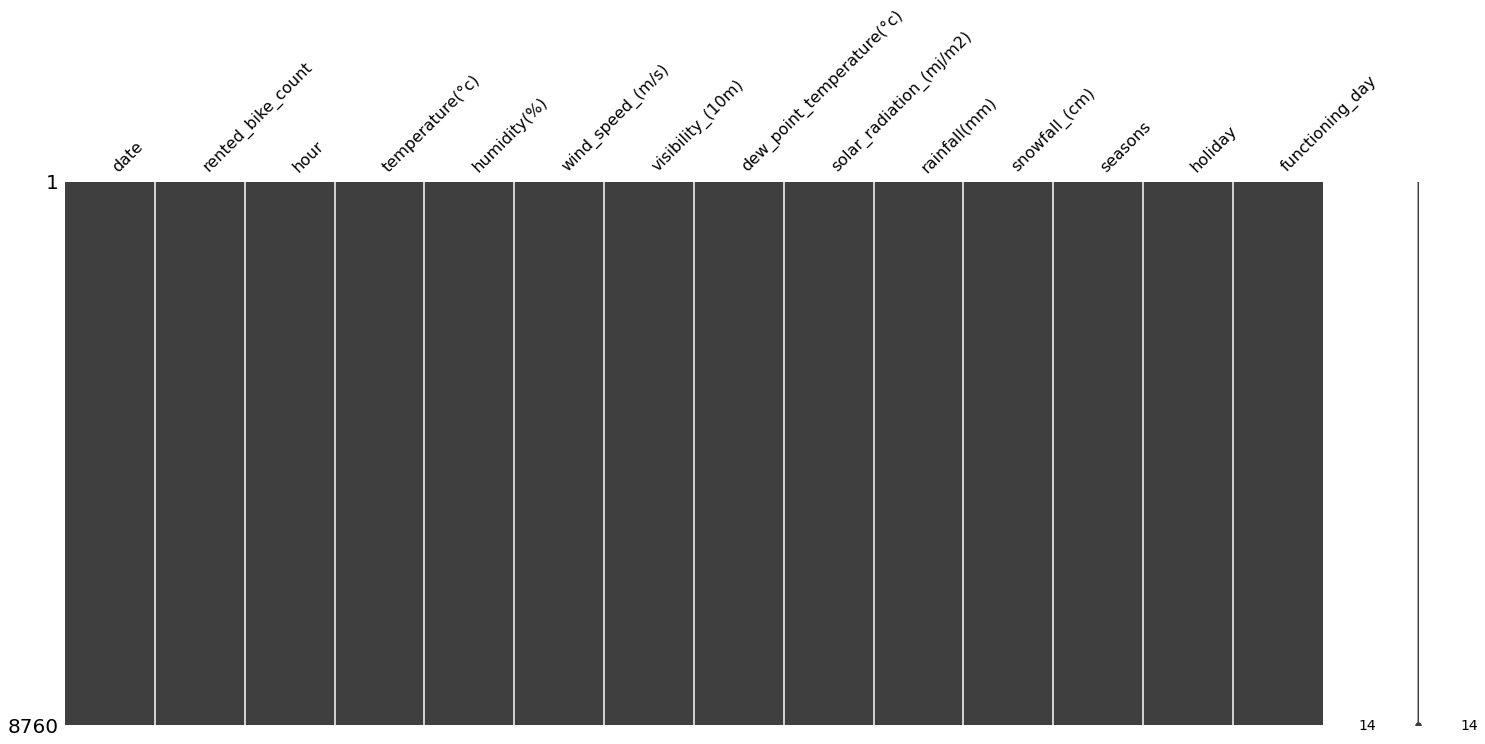

In [15]:
#I could also check it with a missingno library
msno.matrix(df_seoulbike)

### 2.1.5.CHECKING THE DATA'S TYPES 

In [16]:
#Ok really no missing values
#Let's ckeck the type of columns do we have
df_seoulbike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       8760 non-null   object 
 1   rented_bike_count          8760 non-null   int64  
 2   hour                       8760 non-null   int64  
 3   temperature(°c)            8760 non-null   float64
 4   humidity(%)                8760 non-null   int64  
 5   wind_speed_(m/s)           8760 non-null   float64
 6   visibility_(10m)           8760 non-null   int64  
 7   dew_point_temperature(°c)  8760 non-null   float64
 8   solar_radiation_(mj/m2)    8760 non-null   float64
 9   rainfall(mm)               8760 non-null   float64
 10  snowfall_(cm)              8760 non-null   float64
 11  seasons                    8760 non-null   object 
 12  holiday                    8760 non-null   object 
 13  functioning_day            8760 non-null   objec

In [17]:
memory_usage1 = df_seoulbike.memory_usage().sum()

In [18]:
df_seoulbike.dtypes

date                          object
rented_bike_count              int64
hour                           int64
temperature(°c)              float64
humidity(%)                    int64
wind_speed_(m/s)             float64
visibility_(10m)               int64
dew_point_temperature(°c)    float64
solar_radiation_(mj/m2)      float64
rainfall(mm)                 float64
snowfall_(cm)                float64
seasons                       object
holiday                       object
functioning_day               object
dtype: object

In [19]:
int_type = df_seoulbike.select_dtypes(include = "integer").columns.to_list()
float_type = df_seoulbike.select_dtypes(include = "float").columns.to_list()
object_type = df_seoulbike.select_dtypes(include = "object").columns.to_list()

print("The int columns type are: ")
print(int_type)
print()

print("The float columns type are: ")
print(float_type)

print("The object columns type are: ")
print(object_type)



The int columns type are: 
['rented_bike_count', 'hour', 'humidity(%)', 'visibility_(10m)']

The float columns type are: 
['temperature(°c)', 'wind_speed_(m/s)', 'dew_point_temperature(°c)', 'solar_radiation_(mj/m2)', 'rainfall(mm)', 'snowfall_(cm)']
The object columns type are: 
['date', 'seasons', 'holiday', 'functioning_day']


In [20]:
df_seoulbike.select_dtypes(include = "integer").head(3)

,rented_bike_count,hour,humidity(%),visibility_(10m)
0,254,0,37,2000
1,204,1,38,2000
2,173,2,39,2000


In [21]:
df_seoulbike.select_dtypes(include = "float").head(3)

,temperature(°c),wind_speed_(m/s),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
0,-5.2,2.2,-17.6,0.0,0.0,0.0
1,-5.5,0.8,-17.6,0.0,0.0,0.0
2,-6.0,1.0,-17.7,0.0,0.0,0.0


In [22]:
df_seoulbike.select_dtypes(include = "object").head(3)

,date,seasons,holiday,functioning_day
0,01/12/2017,Winter,No Holiday,Yes
1,01/12/2017,Winter,No Holiday,Yes
2,01/12/2017,Winter,No Holiday,Yes


In [23]:
#Hun I'm not sure we need use float64 in all float types. Maybe we can improve it.
#Let's ckeck the usage of all memory.
first_memory_usage = df_seoulbike.memory_usage(deep=True)
first_memory_usage

Index                           128
date                         586920
rented_bike_count             70080
hour                          70080
temperature(°c)               70080
humidity(%)                   70080
wind_speed_(m/s)              70080
visibility_(10m)              70080
dew_point_temperature(°c)     70080
solar_radiation_(mj/m2)       70080
rainfall(mm)                  70080
snowfall_(cm)                 70080
seasons                      551880
holiday                      585624
functioning_day              525305
dtype: int64

## 3.DATA ANALYSING AND PREPROCESSING

### 3.1.Feature Engineering:

##### Ok now we know the type of columns we are working with. Let's casting some of then and create other ones to build our analisys. For that let's create a class to treat our data.


### 3.1.1- Variable Transformation

#### 3.1.1.1 - A class to treat the data

In [24]:


class Treating_data:
    '''
    A class to cast the datetypes and to create new columns date type.. 
    Changing the data type, creating new date columns information and changing the new columns date type.
    '''
    
    def __init__(self, df_bike):
        '''
        Creating the sequence of treating to data.
        '''
        self.df_bike = df_bike
        self.changing_type(self.df_bike)
        self.creating_date_info(self.df_bike)
        self.changing_type_after_date_info(self.df_bike)
        self.changing_to_binary_column(self.df_bike)


    def changing_type(self,df_seoulbike):
        '''
        A functon to change the size of float type, 
        to create a column to datetime type and change object type to category type.
        '''
        for coluna in df_seoulbike.columns:
            if "temperature" in coluna:
                df_seoulbike[coluna] = df_seoulbike[coluna].astype("float16")
            elif "date" in coluna:
                df_seoulbike[coluna] = pd.to_datetime(arg=df_seoulbike[coluna],format= "%d/%m/%Y")
            elif coluna in ['seasons','holiday','functioning_day']:
                df_seoulbike[coluna] = df_seoulbike[coluna].astype("category")
        return  df_seoulbike


    def creating_date_info(self,df_seoulbike):
        '''
        A function to create date type columns.
        '''
        df_seoulbike['day_of_week'] =df_seoulbike['date'].dt.weekday #The day of the week with Monday=0, Sunday=6.
        #df_seoulbike['day_of_week'] =df_seoulbike['date'].dt.day_name() 
        df_seoulbike['year'] = df_seoulbike['date'].dt.year
        df_seoulbike['month'] = df_seoulbike['date'].dt.month #I need this feature to stratify during the train and test moment
        #df_seoulbike['day_of_year'] = df_seoulbike['date'].dt.dayofyear
        #df_seoulbike['week_of_year'] = df_seoulbike['date'].dt.isocalendar().week
        #df_seoulbike['month_name'] = df_seoulbike['date'].dt.month_name()
        #df_seoulbike['period_day'] = df_seoulbike['date'].dt.strftime('%a')
        df_seoulbike['month_name'] = df_seoulbike['date'].dt.strftime('%b')
        return  df_seoulbike

    def changing_type_after_date_info(self,df_seoulbike):
        '''
        A function to cast columns as category.
        '''
        for coluna in df_seoulbike.columns:
            if coluna in ['day_of_week','year','month','week_of_year', 'month_name','hour']:
                df_seoulbike[coluna] = df_seoulbike[coluna].astype("category")
        return  df_seoulbike
    
    def changing_to_binary_column(self,df_seoulbike):
        '''
         A function to cast columns as binary.
        '''
        df_seoulbike["holiday"] = df_seoulbike["holiday"].map({"No Holiday":0,"Holiday":1})
        df_seoulbike["functioning_day"] = df_seoulbike["functioning_day"].map({"No" : 0, "Yes":1})


In [25]:
#let's instancied our data into the class
df_seoulbike = Treating_data(df_seoulbike)

In [26]:
df_seoulbike.df_bike.head(7)

,date,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,month_name
0,2017-12-01,254,0,-5.199219,37,2.2,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
1,2017-12-01,204,1,-5.500000,38,0.8,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
2,2017-12-01,173,2,-6.000000,39,1.0,2000,-17.703125,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
3,2017-12-01,107,3,-6.199219,40,0.9,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
4,2017-12-01,78,4,-6.000000,36,2.3,2000,-18.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
5,2017-12-01,100,5,-6.398438,37,1.5,2000,-18.703125,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
6,2017-12-01,181,6,-6.601562,35,1.3,2000,-19.500000,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec


In [27]:

df_seoulbike_treated = df_seoulbike.df_bike

In [28]:
#saving the dataframe to use in Power BI Analysis
df_seoulbike_treated.to_csv('../documents/df_seoulbike_treated.csv', index=False) 

In [29]:
#checking the new information of the data types and memory usage.
#As you can see we change the type of the data.
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       8760 non-null   datetime64[ns]
 1   rented_bike_count          8760 non-null   int64         
 2   hour                       8760 non-null   category      
 3   temperature(°c)            8760 non-null   float16       
 4   humidity(%)                8760 non-null   int64         
 5   wind_speed_(m/s)           8760 non-null   float64       
 6   visibility_(10m)           8760 non-null   int64         
 7   dew_point_temperature(°c)  8760 non-null   float16       
 8   solar_radiation_(mj/m2)    8760 non-null   float64       
 9   rainfall(mm)               8760 non-null   float64       
 10  snowfall_(cm)              8760 non-null   float64       
 11  seasons                    8760 non-null   category      
 12  holida

In [30]:
df_seoulbike_treated.select_dtypes(include = "float").columns.to_list()

['wind_speed_(m/s)',
 'solar_radiation_(mj/m2)',
 'rainfall(mm)',
 'snowfall_(cm)']

In [31]:
#We still having something to work here. See, we had cast all the numerical types as 64. But do we really need it?
#Let's check the max and min of each column

df_seoulbike_treated.select_dtypes(include = "float").describe()

,wind_speed_(m/s),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,1.724909,0.569111,0.148687,0.075068
std,1.036300,0.868746,1.128193,0.436746
min,0.000000,0.000000,0.000000,0.000000
25%,0.900000,0.000000,0.000000,0.000000
50%,1.500000,0.010000,0.000000,0.000000
75%,2.300000,0.930000,0.000000,0.000000
max,7.400000,3.520000,35.000000,8.800000


In [32]:
#The np.finfo(dtype) function provides information about machine limits for floating-point data types

print(f"The range of the float64 is {np.finfo(np.float64)}")
print(f"The range of the float32 is {np.finfo(np.float32)}")
print(f"The range of the float16 is {np.finfo(np.float16)}")

The range of the float64 is Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
---------------------------------------------------------------

The range of the float32 is Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------

The range of the float16 is Machine parameters for floa

*eps (epsilon)*: The difference between 1.0 and the next representable floating point number greater than 1.0. For example, for 64-bit binary floats in the IEEE-754 standard, eps is approximately 2.22e-16. 
  
*epsneg:* The difference between 1.0 and the next representable floating point number less than 1.0. For 64-bit binary floats, epsneg is approximately 1.11e-16.  
  
*max:* The largest representable number of the appropriate floating point type.
  
*min:* The smallest representable number of the appropriate floating point type (usually the negative of the maximum value).  
  
*precision:* The approximate number of decimal digits this type of float is accurate to.

In [33]:
# Ok let's cast the float columns considering the interval of it float type.

df_seoulbike_treated['wind_speed_(m/s)'] = df_seoulbike_treated['wind_speed_(m/s)'].astype("float32")
df_seoulbike_treated['solar_radiation_(mj/m2)'] = df_seoulbike_treated['solar_radiation_(mj/m2)'].astype("float32")
df_seoulbike_treated['snowfall_(cm)'] = df_seoulbike_treated['snowfall_(cm)'].astype("float32")

In [34]:
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       8760 non-null   datetime64[ns]
 1   rented_bike_count          8760 non-null   int64         
 2   hour                       8760 non-null   category      
 3   temperature(°c)            8760 non-null   float16       
 4   humidity(%)                8760 non-null   int64         
 5   wind_speed_(m/s)           8760 non-null   float32       
 6   visibility_(10m)           8760 non-null   int64         
 7   dew_point_temperature(°c)  8760 non-null   float16       
 8   solar_radiation_(mj/m2)    8760 non-null   float32       
 9   rainfall(mm)               8760 non-null   float64       
 10  snowfall_(cm)              8760 non-null   float32       
 11  seasons                    8760 non-null   category      
 12  holida

In [35]:
memory_usage2 = df_seoulbike_treated.memory_usage().sum()

#### 3.1.1.1.2 - Checking the memory usage after casted the data

In [36]:
print(memory_usage1)
print(memory_usage2)
print(f'The memory usage improved in {round((memory_usage2/memory_usage1)*100,2)}%')

981248
563240
The memory usage improved in 57.4%


In [37]:
df_seoulbike_treated.describe()

,rented_bike_count,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,inf,58.226256,1.724905,1436.825799,4.074219,0.569111,0.148687,0.075068
std,644.997468,11.945312,20.362413,1.036305,608.298712,13.054688,0.868734,1.128193,0.436725
min,0.000000,-17.796875,0.000000,0.000000,27.000000,-30.593750,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.699219,0.000000,0.000000,0.000000
50%,504.500000,13.703125,57.000000,1.500000,1698.000000,5.101562,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.796875,0.930000,0.000000,0.000000
max,3556.000000,39.406250,98.000000,7.400000,2000.000000,27.203125,3.520000,35.000000,8.800000


In [38]:
#checking the shape
df_seoulbike_treated.shape

(8760, 18)

##### 3.1.1.1.3 - Checking the categorical columns

In [39]:
df_categorical_columns = df_seoulbike_treated.select_dtypes(include = "category")
df_categorical_columns 

,hour,seasons,holiday,functioning_day,day_of_week,year,month,month_name
0,0,Winter,0,1,4,2017,12,Dec
1,1,Winter,0,1,4,2017,12,Dec
2,2,Winter,0,1,4,2017,12,Dec
3,3,Winter,0,1,4,2017,12,Dec
4,4,Winter,0,1,4,2017,12,Dec
...,...,...,...,...,...,...,...,...
8755,19,Autumn,0,1,4,2018,11,Nov
8756,20,Autumn,0,1,4,2018,11,Nov
8757,21,Autumn,0,1,4,2018,11,Nov
8758,22,Autumn,0,1,4,2018,11,Nov


In [40]:
categorical_columns = df_categorical_columns.columns
categorical_columns

Index(['hour', 'seasons', 'holiday', 'functioning_day', 'day_of_week', 'year',
       'month', 'month_name'],
      dtype='object')

In [41]:
df_seoulbike_treated.head(7)

,date,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,month_name
0,2017-12-01,254,0,-5.199219,37,2.2,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
1,2017-12-01,204,1,-5.500000,38,0.8,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
2,2017-12-01,173,2,-6.000000,39,1.0,2000,-17.703125,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
3,2017-12-01,107,3,-6.199219,40,0.9,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
4,2017-12-01,78,4,-6.000000,36,2.3,2000,-18.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
5,2017-12-01,100,5,-6.398438,37,1.5,2000,-18.703125,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
6,2017-12-01,181,6,-6.601562,35,1.3,2000,-19.500000,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec


In [42]:
#Let's varify how many years do we have
df_seoulbike_treated['year'].unique()

[2017, 2018]
Categories (2, int64): [2017, 2018]

In [43]:
df_seoulbike_treated = df_seoulbike_treated.drop(["date"],axis=1, inplace=False)

In [44]:
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   rented_bike_count          8760 non-null   int64   
 1   hour                       8760 non-null   category
 2   temperature(°c)            8760 non-null   float16 
 3   humidity(%)                8760 non-null   int64   
 4   wind_speed_(m/s)           8760 non-null   float32 
 5   visibility_(10m)           8760 non-null   int64   
 6   dew_point_temperature(°c)  8760 non-null   float16 
 7   solar_radiation_(mj/m2)    8760 non-null   float32 
 8   rainfall(mm)               8760 non-null   float64 
 9   snowfall_(cm)              8760 non-null   float32 
 10  seasons                    8760 non-null   category
 11  holiday                    8760 non-null   category
 12  functioning_day            8760 non-null   category
 13  day_of_week                8760 n

In [45]:
df_seoulbike_treated.head(7)

,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,month_name
0,254,0,-5.199219,37,2.2,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
1,204,1,-5.500000,38,0.8,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
2,173,2,-6.000000,39,1.0,2000,-17.703125,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
3,107,3,-6.199219,40,0.9,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
4,78,4,-6.000000,36,2.3,2000,-18.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
5,100,5,-6.398438,37,1.5,2000,-18.703125,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
6,181,6,-6.601562,35,1.3,2000,-19.500000,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec


In [46]:
df_seoulbike_treated.describe()

,rented_bike_count,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,inf,58.226256,1.724905,1436.825799,4.074219,0.569111,0.148687,0.075068
std,644.997468,11.945312,20.362413,1.036305,608.298712,13.054688,0.868734,1.128193,0.436725
min,0.000000,-17.796875,0.000000,0.000000,27.000000,-30.593750,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.699219,0.000000,0.000000,0.000000
50%,504.500000,13.703125,57.000000,1.500000,1698.000000,5.101562,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.796875,0.930000,0.000000,0.000000
max,3556.000000,39.406250,98.000000,7.400000,2000.000000,27.203125,3.520000,35.000000,8.800000


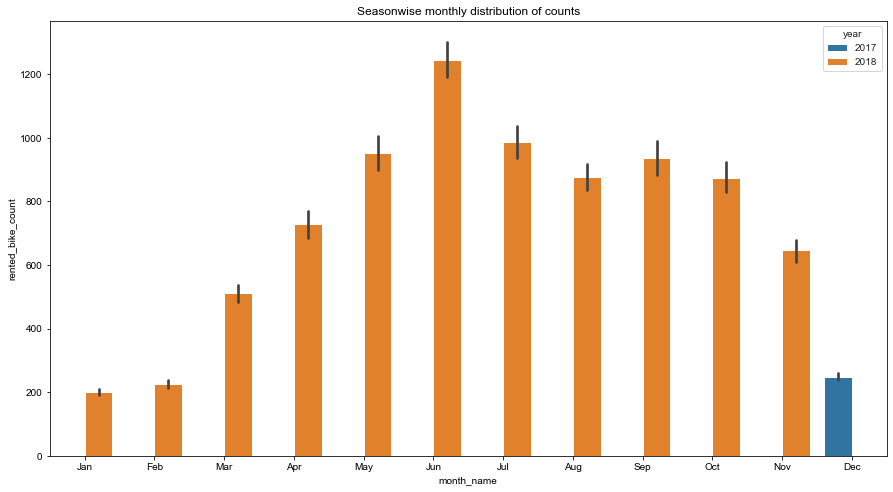

In [47]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month_name',y='rented_bike_count',data=df_seoulbike_treated[['month_name','rented_bike_count','year']],hue='year',order=['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

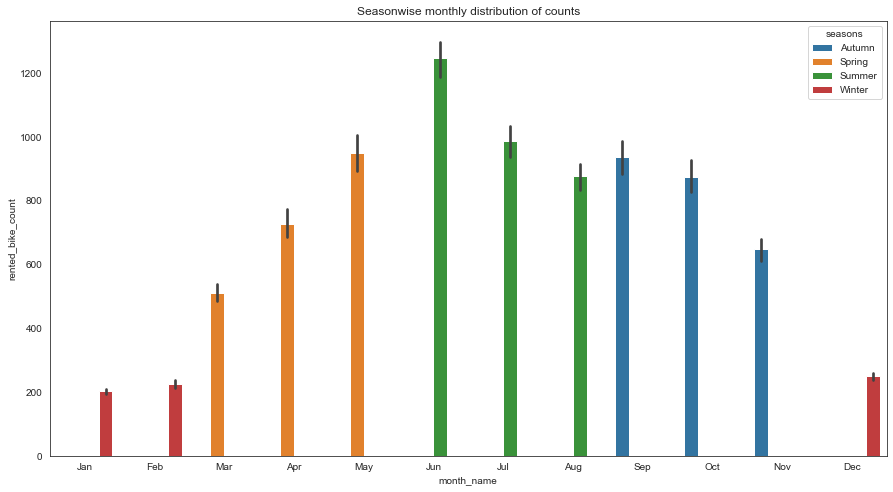

In [48]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month_name',y='rented_bike_count',data=df_seoulbike_treated[['month_name','rented_bike_count','seasons']],hue='seasons',order=['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

### Detecting Outliers

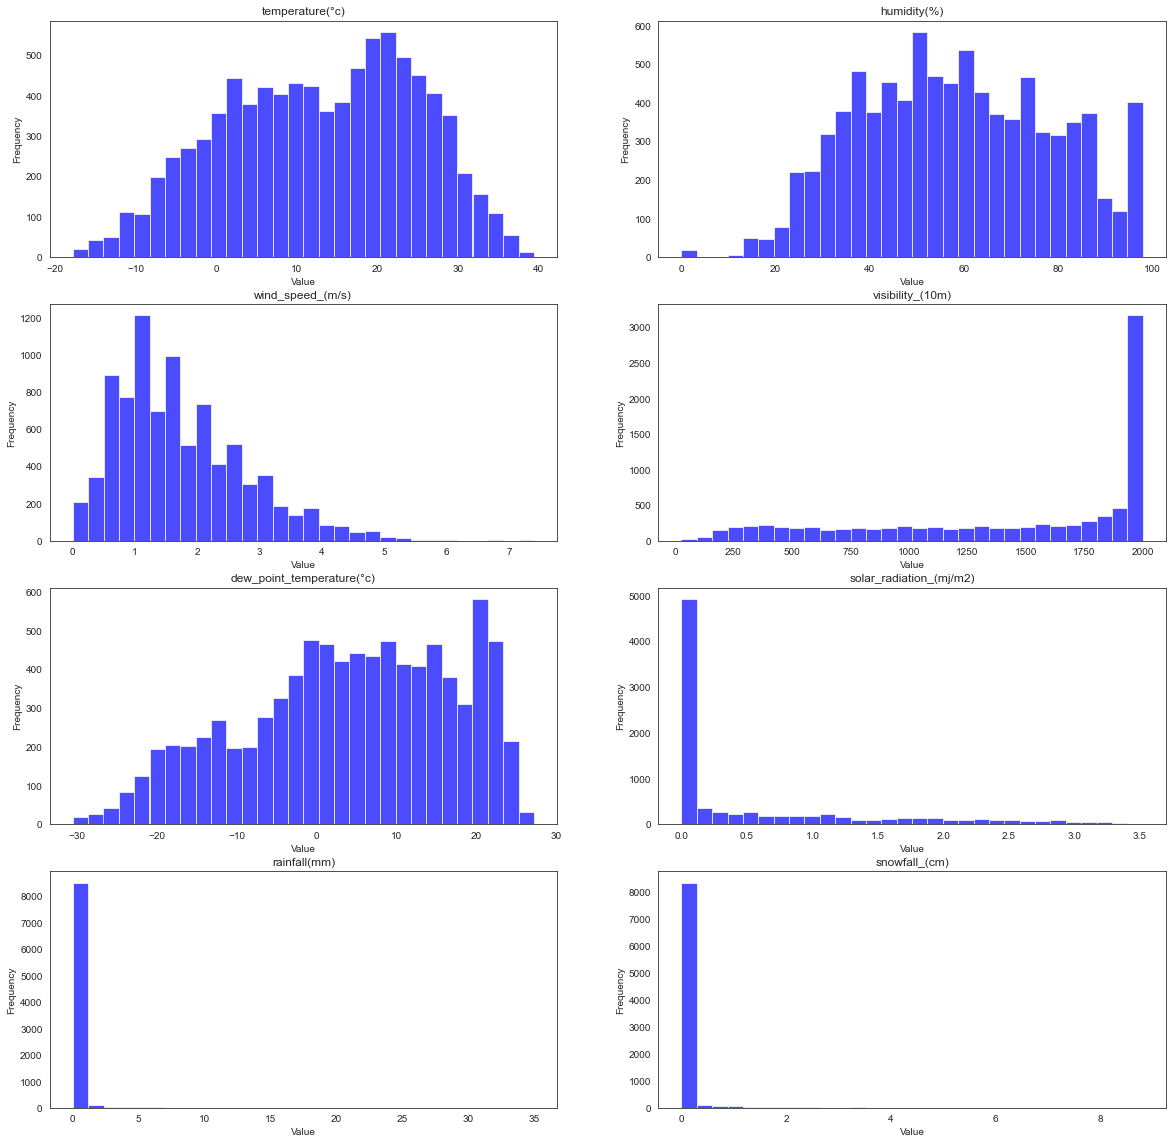

In [49]:
#First let's build a histogram to each numerical feature in our dataset.

featuare =["temperature(°c)","humidity(%)","wind_speed_(m/s)",
     "visibility_(10m)", "dew_point_temperature(°c)",
     "solar_radiation_(mj/m2)","rainfall(mm)","snowfall_(cm)"
    ]
    

# Creating a figure and subplots for each feature
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))  

# Iterating over each feature
for i, attribute in enumerate(featuare):  
    row, col = divmod(i, 2)
    axes[row, col].hist(df_seoulbike_treated[attribute], bins=30, color="blue", alpha=0.7)
    axes[row, col].set_title(attribute)
    
# Adjusting label and titles
for ax in axes.flat:
    ax.set(xlabel="Value", ylabel="Frequency")

# Oculte os rótulos do eixo x e y nos subplots superiores e à direita
#for ax in axes.flat:
#    ax.label_outer()

# Showing the chart
plt.show()

In [50]:
#Desvio padrão
temp_media,temp_std = df_seoulbike_treated["temperature(°c)"].mean(),df_seoulbike_treated["temperature(°c)"].std()
cut_off = temp_std*3
lower, upper = temp_media-cut_off,temp_media+cut_off
idx = np.where((df_seoulbike_treated["temperature(°c)"]<lower)|(df_seoulbike_treated["temperature(°c)"]>upper))


In [51]:
#checking the values
print(temp_media)
print(temp_std)
print(f" Indexes to exclude {idx}, the length of idx is {len(idx[0])}." )

inf
11.945
 Indexes to exclude (array([   0,    1,    2, ..., 8757, 8758, 8759], dtype=int64),), the length of idx is 8760.


In [52]:
# we have a problem here.. the media if infinite. We have to cast the number as float64so solve it.


df_seoulbike_treated["temperature(°c)"] = df_seoulbike_treated["temperature(°c)"].astype("float64")

In [53]:
#now lets to it again
#Desvio padrão
temp_media,temp_std = df_seoulbike_treated["temperature(°c)"].mean(),df_seoulbike_treated["temperature(°c)"].std()
cut_off = temp_std*3
lower, upper = temp_media-cut_off,temp_media+cut_off
idx = np.where((df_seoulbike_treated["temperature(°c)"]<lower)|(df_seoulbike_treated["temperature(°c)"]>upper))
#checking the values
print(temp_media)
print(temp_std)
print(f" Indexes to exclude {idx}, the length of idx is {len(idx[0])}." )


12.882921791947595
11.94488062956912
 Indexes to exclude (array([], dtype=int64),), the length of idx is 0.


#Veja o array ficou zerado... 

Relação com o seu Cálculo:
O seu cálculo do cut_off usando temp_std * 3 é uma aproximação semelhante ao método dos outliers extremos.
Ele define uma faixa de valores em torno da média (ou mediana) que é considerada “normal”.
Valores fora dessa faixa são considerados outliers.

Ok neste caso vou calcular por 1,5 aproximado do desvio leve the Tukey

Sim, você está correto! A substituição do fator de multiplicação de 3 por 1,5 é uma aproximação dos outliers leves (ou mild outliers) de Tukey. Vamos entender melhor:

Outliers Leves (Mild Outliers):
Os outliers leves são valores que estão moderadamente distantes dos quartis (Q1 e Q3) em uma distribuição.
O método dos limites de Tukey define os limites inferior e superior para detecção de outliers leves como:
Limite Inferior: Q1 - 1,5 * IQR
Limite Superior: Q3 + 1,5 * IQR
Valores fora dessa faixa são considerados outliers leves.
Relação com o seu Cálculo:
Ao usar temp_std * 1,5, você está aplicando uma abordagem semelhante aos outliers leves de Tukey.
Essa escolha é mais conservadora do que o uso de 3 desvios padrão, pois considera menos valores como outliers.
Contexto e Ajuste:
A escolha do fator de multiplicação depende do contexto dos seus dados e da sensibilidade à detecção de outliers.
Se você deseja ser mais rigoroso na identificação de outliers, pode usar 3 desvios padrão (como você fez inicialmente).
Se preferir uma abordagem mais suave, 1,5 desvio padrão é uma opção adequada.
Portanto, ajustar o fator de multiplicação para 1,5 é uma maneira válida de aproximar os outliers leves de Tukey. Escolha o valor que melhor se alinha com seus objetivos de análise

In [54]:
#now lets to it again with 1,5
#Desvio padrão
temp_media,temp_std = df_seoulbike_treated["temperature(°c)"].mean(),df_seoulbike_treated["temperature(°c)"].std()
cut_off = temp_std*1.5
lower, upper = temp_media-cut_off,temp_media+cut_off
idx = np.where((df_seoulbike_treated["temperature(°c)"]<lower)|(df_seoulbike_treated["temperature(°c)"]>upper))
#checking the values
print(temp_media)
print(temp_std)
print(f" Indexes to exclude {idx}, the length of idx is {len(idx[0])}." )


12.882921791947595
11.94488062956912
 Indexes to exclude (array([   0,    1,    2, ..., 6373, 6375, 6376], dtype=int64),), the length of idx is 1125.


Ok, este foi um cálculo aproximado do método de Tukey, mas vou fazer agora  o método real e ver a diferença. Assim serei mais precisa.
O cálculo que você usou, multiplicando o desvio padrão por um fator (como 3), é uma abordagem comum para detectar outliers. No entanto, ele não é especificamente chamado de “método de desvio padrão”. Vamos esclarecer:

Desvio Padrão:
O desvio padrão é uma medida de dispersão que indica o quanto os valores de um conjunto de dados se afastam da média.
Ele não é usado diretamente para detectar outliers, mas é uma ferramenta importante para entender a variabilidade dos dados.
Método de Tukey:
O método de Tukey, desenvolvido por John Tukey, é uma abordagem mais geral para detectar outliers.
Ele usa os quartis (Q1 e Q3) e o IQR (intervalo interquartil) para definir limites para identificar valores incomuns.
Os limites inferior e superior são calculados como:
Limite Inferior: Q1 - 1,5 * IQR
Limite Superior: Q3 + 1,5 * IQR
Valores fora desses limites são considerados outliers.
Relação com o seu Cálculo:
O seu cálculo usando o desvio padrão multiplicado por 3 é uma aproximação dos limites de Tukey.
Embora não seja exatamente o mesmo método, ele segue uma lógica semelhante para identificar valores extremos.
Portanto, o que você fez não está errado, mas é importante entender que existem diferentes abordagens para detectar outliers. O método de Tukey é mais robusto e leva em consideração a variabilidade dos dados. Se você deseja uma detecção mais precisa, considere usar os limites de Tukey. 🚀 1: https://www.ermontoro.com/post/teste-rápido-de-tukey 2: https://statologos.com/prueba-de-tukey-diferencia-significativa-honesta/ 3: https://www.infoescola.com/estatistica/teste-de-comparacao-de-medias-teste-de-tukey/ 4: https://edisciplinas.usp.br/pluginfile.php/4434614/mod_resource/content/0/aula6.pdf

## Tukey

### Calculating the Mild Outliers

In [55]:
df_seoulbike_treated["temperature(°c)"].describe()

count    8760.000000
mean       12.882922
std        11.944881
min       -17.796875
25%         3.500000
50%        13.703125
75%        22.500000
max        39.406250
Name: temperature(°c), dtype: float64

In [56]:
temp_Q1 = df_seoulbike_treated["temperature(°c)"].quantile(0.25)
temp_Q3 = df_seoulbike_treated["temperature(°c)"].quantile(0.75)

print(f"The first Quantile of Temperature is {temp_Q1}")
print(f"The Thrid Quantile of Temperature is {temp_Q3}")

The first Quantile of Temperature is 3.5
The Thrid Quantile of Temperature is 22.5


In [57]:
temp_IQR =temp_Q3-temp_Q1
temp_IQR

19.0

In [58]:
#Calculating the Mild Outliers

temp_lower_bound = temp_Q1-(1.5 * temp_IQR)
temp_upper_bound = temp_Q3+(1.5 * temp_IQR)
print(f"The Temperature Mild Lower Bound is {temp_lower_bound}")
print(f"The Temperature Mild Upper Bound is {temp_upper_bound}")

The Temperature Mild Lower Bound is -25.0
The Temperature Mild Upper Bound is 51.0


In [59]:
#Nowlet's find the real outliers

idxIQMild = np.where((df_seoulbike_treated["temperature(°c)"]<temp_lower_bound)|(df_seoulbike_treated["temperature(°c)"]>temp_upper_bound))
print(f" Indexes to exclude {idxIQMild}, the length of idx is {len(idxIQMild[0])}." )

 Indexes to exclude (array([], dtype=int64),), the length of idx is 0.


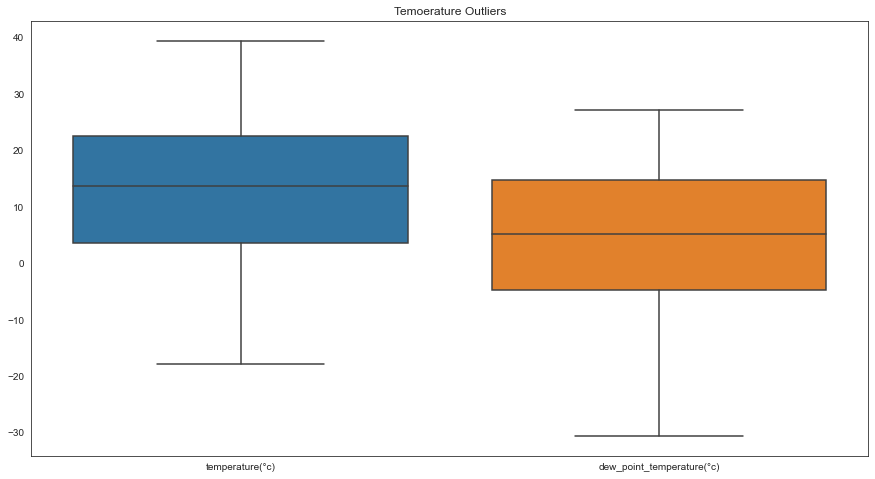

In [60]:
#Hun that means that we dont have outliers here, Let's see it in detail: 

celsius = []
for mensure in float_type:
    if '(°c)' in mensure:
        celsius.append(mensure)
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for xxx _outliers
sns.boxplot(data=df_seoulbike_treated[celsius])
ax.set_title('Temoerature Outliers')
plt.show()

### Humidity Outliers

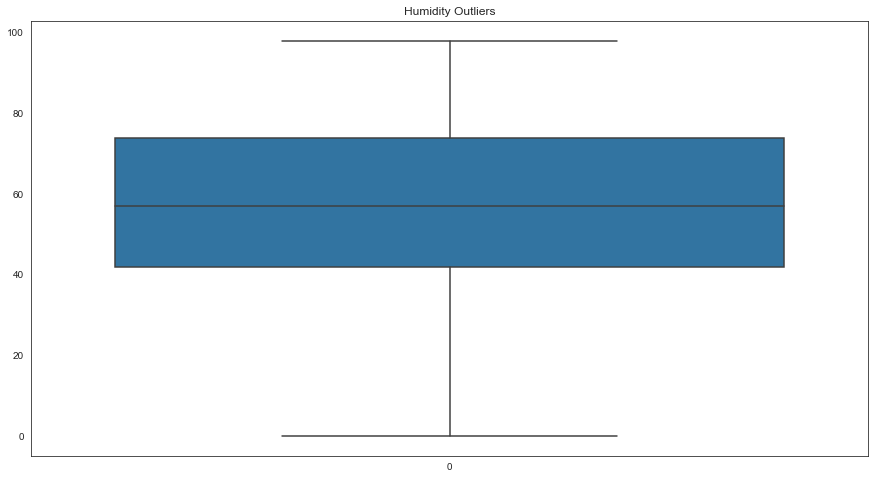

In [61]:
#OK good lets check the humidty

fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Humidity Outliers
sns.boxplot(data=df_seoulbike_treated['humidity(%)'])
ax.set_title('Humidity Outliers')
plt.show()

### Wind Speed Outliers

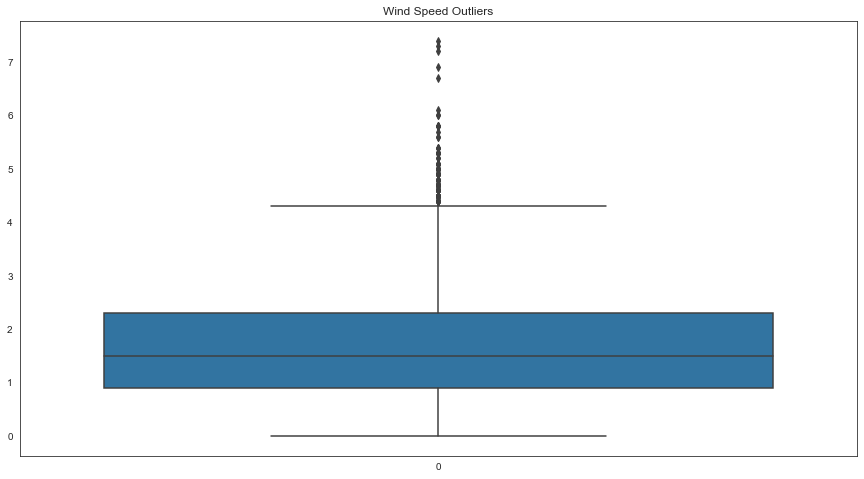

In [62]:
#Wind Speed
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Wind Speed Outliers
sns.boxplot(data=df_seoulbike_treated['wind_speed_(m/s)'])
ax.set_title('Wind Speed Outliers')
plt.show()

In [63]:
#wow we have a lot of outliers here. Let's identify them:



In [64]:
df_seoulbike_treated['wind_speed_(m/s)'].describe()

count    8760.000000
mean        1.724905
std         1.036305
min         0.000000
25%         0.900000
50%         1.500000
75%         2.300000
max         7.400000
Name: wind_speed_(m/s), dtype: float64

In [65]:
wind_speed_Q1 = df_seoulbike_treated['wind_speed_(m/s)'].quantile(0.25)
wind_speed_Q3 = df_seoulbike_treated['wind_speed_(m/s)'].quantile(0.75)

print(f"The first Quantile of Wind_Speed is {wind_speed_Q1}")
print(f"The Thrid Quantile of Wind_Speed is {wind_speed_Q3}")

The first Quantile of Wind_Speed is 0.8999999761581421
The Thrid Quantile of Wind_Speed is 2.299999952316284


In [66]:
wind_speed_IQR = wind_speed_Q3-wind_speed_Q1
wind_speed_IQR

1.399999976158142

### Calculating the Mild Outliers

In [67]:
#Calculating the Mild Outliers

mild_lower_bound = wind_speed_Q1-(1.5 * wind_speed_IQR)
mild_upper_bound = wind_speed_Q3+(1.5 * wind_speed_IQR)
print(f"The Mild Lower Bound is {mild_lower_bound}")
print(f"The Mild Upper Bound is {mild_upper_bound}")

The Mild Lower Bound is -1.199999988079071
The Mild Upper Bound is 4.399999916553497


### Calculating the Extreme Outlier


In [68]:
extreme_lower_bound = wind_speed_Q1-(3 * wind_speed_IQR)
extreme_upper_bound = wind_speed_Q3+(3 * wind_speed_IQR)
print(f"The Extreme Lower Bound is {extreme_lower_bound}")
print(f"The Extreme Upper Bound is {extreme_upper_bound}")

The Extreme Lower Bound is -3.299999952316284
The Extreme Upper Bound is 6.4999998807907104


In [69]:
outliers_lied_upper = df_seoulbike_treated['wind_speed_(m/s)']>mild_upper_bound

In [70]:
#Now let's determine the number of outlier thar are lie outside of the mild_upper_bound

number_of_outliers_lied_upper=(df_seoulbike_treated['wind_speed_(m/s)']>mild_upper_bound).sum()
number_of_outliers_lied_upper

144

In [71]:
#Calculating the percentage of wind_speed lied over the Mild Upper Bound
(df_seoulbike_treated['wind_speed_(m/s)']>mild_upper_bound).mean()*100

1.643835616438356

In [72]:
#So now we'll identify which ones they are.
wind_speed_outliers= df_seoulbike_treated[df_seoulbike_treated['wind_speed_(m/s)']>mild_upper_bound]
wind_speed_outliers

,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,month_name
82,311,10,-1.099609,40,4.5,2000,-13.000000,0.64,0.0,0.0,Winter,0,1,0,2017,12,Dec
84,393,12,-0.300049,38,4.8,1823,-12.898438,1.11,0.0,0.0,Winter,0,1,0,2017,12,Dec
85,391,13,0.000000,30,5.4,1938,-15.500000,1.17,0.0,0.0,Winter,0,1,0,2017,12,Dec
86,338,14,0.099976,27,4.5,2000,-16.703125,1.09,0.0,0.0,Winter,0,1,0,2017,12,Dec
87,341,15,-0.099976,25,5.8,2000,-17.796875,0.88,0.0,0.0,Winter,0,1,0,2017,12,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7933,1118,13,10.601562,38,4.6,2000,-3.099609,1.63,0.0,0.0,Autumn,0,1,5,2018,10,Oct
7937,1176,17,9.500000,34,5.7,2000,-5.601562,0.45,0.0,0.0,Autumn,0,1,5,2018,10,Oct
7985,1274,17,10.000000,43,4.9,2000,-2.000000,0.43,0.0,0.0,Autumn,0,1,0,2018,10,Oct
8242,0,10,11.296875,68,4.7,1984,5.500000,0.44,0.0,0.0,Autumn,0,0,4,2018,11,Nov


In [73]:
wind_speed_outliers.describe()

,rented_bike_count,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,540.416667,7.561092,43.159722,4.942362,1670.097222,-5.160156,1.204167,0.165278,0.086806
std,470.266678,11.784777,19.727041,0.545494,501.575508,13.898438,1.036060,1.116333,0.254263
min,0.000000,-14.500000,14.000000,4.500000,214.000000,-30.593750,0.000000,0.000000,0.000000
25%,190.750000,-2.024902,30.000000,4.600000,1560.250000,-17.726562,0.160000,0.000000,0.000000
50%,314.000000,5.298828,37.000000,4.800000,1928.500000,-6.300781,1.090000,0.000000,0.000000
75%,939.500000,18.644531,53.000000,5.000000,2000.000000,5.125977,1.890000,0.000000,0.000000
max,2068.000000,33.312500,96.000000,7.400000,2000.000000,23.093750,3.320000,13.000000,1.000000


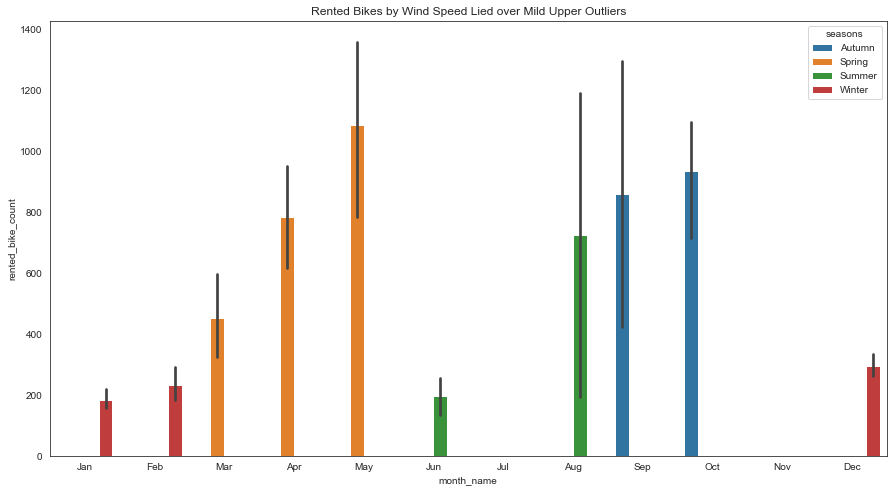

In [74]:
#let's see in which season that happened

fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month_name',y='rented_bike_count',data=wind_speed_outliers[['month_name','rented_bike_count','seasons']],hue='seasons',order=['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],ax=ax)

ax.set_title('Rented Bikes by Wind Speed Lied over Mild Upper Outliers')
plt.show()

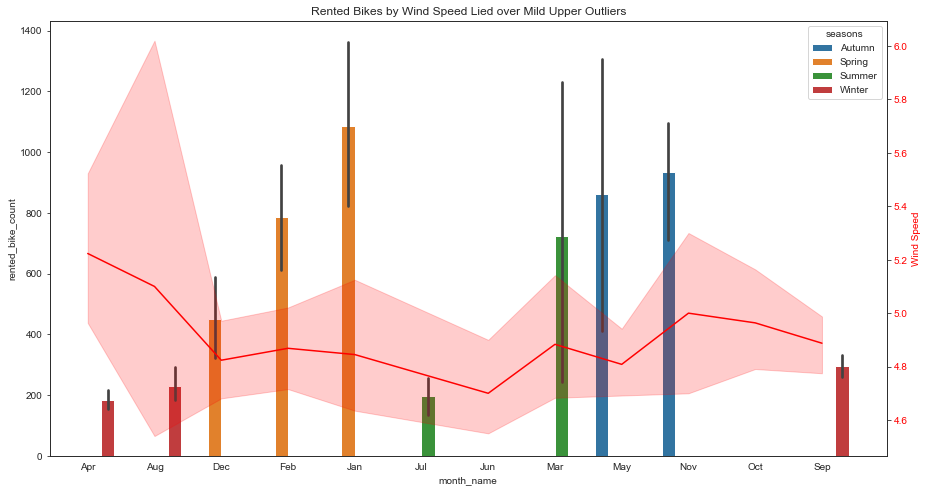

In [75]:
#let's see in which season that happened

fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month_name',y='rented_bike_count',data=wind_speed_outliers[['month_name','rented_bike_count','seasons']],hue='seasons',order=['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],ax=ax)

# Criar o segundo eixo y
ax2 = ax.twinx()

# Plotar a variável "wind speed" no segundo eixo y
sns.lineplot(x='month_name', y='wind_speed_(m/s)', data=wind_speed_outliers, color='red', ax=ax2)

# Personalizar o segundo eixo y
ax2.set_ylabel('Wind Speed', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax.set_title('Rented Bikes by Wind Speed Lied over Mild Upper Outliers')
plt.show()

Interresting, we can see that are some months that we don't have rented bikes with a over lied speed wind. Let's considering that we are filtering just data with speed outliers. Lets check it with all the data.

O “sombreamento” vermelho ao redor da linha vermelha no gráfico é conhecido como intervalo de confiança. Ele não representa a média, mas sim a variabilidade dos dados. Vou explicar em detalhes:

Intervalo de Confiança (CI):
O Seaborn, ao plotar uma linha (ou qualquer outra série temporal) com sns.lineplot(), por padrão, inclui um intervalo de confiança.
Esse intervalo de confiança é uma faixa sombreada que mostra a variabilidade dos dados em torno da linha.
Ele é calculado com base na dispersão dos valores e geralmente é definido como um intervalo de 95% de confiança.
O que o intervalo de confiança representa?:
O intervalo de confiança indica a incerteza associada à estimativa da linha (ou série temporal).
Em outras palavras, ele nos diz quão confiantes podemos estar de que a verdadeira linha (ou série temporal) está dentro dessa faixa.
Variabilidade dos Dados:
Quando você tem vários valores de “wind speed” no mesmo mês, a variabilidade pode ser alta.
O intervalo de confiança reflete essa variabilidade, mostrando a dispersão dos dados ao redor da linha média.
Personalização do Intervalo de Confiança:
Se você deseja remover o intervalo de confiança, pode fazê-lo especificando ci=None no sns.lineplot().
Por exemplo:
Python

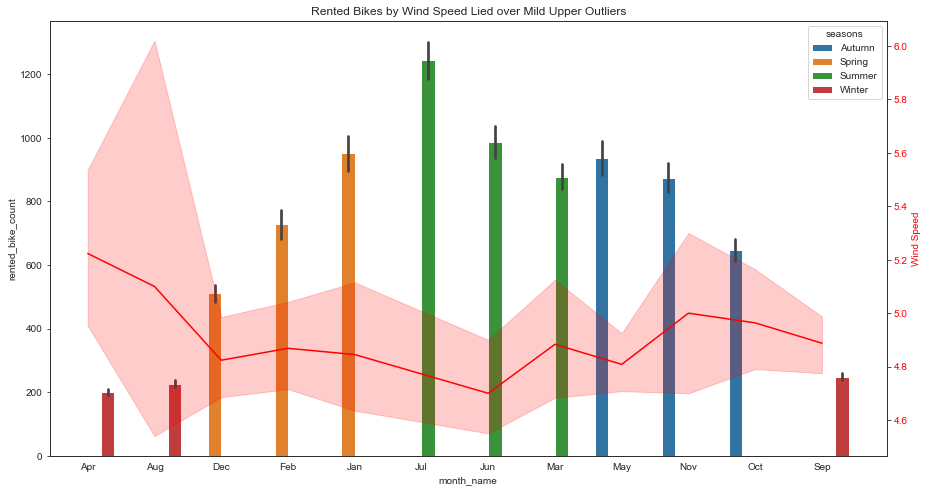

In [76]:
#let's see in which season that happened

fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month_name',y='rented_bike_count',data=df_seoulbike_treated[['month_name','rented_bike_count','seasons']],hue='seasons',order=['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],ax=ax)

# Criar o segundo eixo y
ax2 = ax.twinx()

# Plotar a variável "wind speed" no segundo eixo y
sns.lineplot(x='month_name', y='wind_speed_(m/s)', data=wind_speed_outliers, color='red', ax=ax2)

# Personalizar o segundo eixo y
ax2.set_ylabel('Wind Speed', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax.set_title('Rented Bikes by Wind Speed Lied over Mild Upper Outliers')
plt.show()

In [77]:
df_seoulbike_treated['wind_speed_(m/s)'].describe()

count    8760.000000
mean        1.724905
std         1.036305
min         0.000000
25%         0.900000
50%         1.500000
75%         2.300000
max         7.400000
Name: wind_speed_(m/s), dtype: float64

### Using the Binning technique


In [78]:
### to deal with thi outlier I will use the binning tecnic. Considering that in fall season the wind tends to be strong.
### for exemple:

#Winds of 1.5 m/s would be attributed to the “weak” bin.
#Winds of 3.5 m/s would be assigned to the “moderate” bin.
#Winds of 5 m/s would be attributed to the “strong” bin.

#I will based on the Beaufort scale

#We know that this dataset has the max value of wind as 7.4. I will consider it as our max value here.
#I will consider that any value over the 13.8 is a considerable wind just like beaufort scale.

# Defining the bins and labels for binning tecnic
bins = [0.0, 1.5, 3.3, 5.4,7.9,10.7,13.8, float('inf')]
labels = ['1_calm', '2_plowing', '3_light breeze', '4_weak breeze','5_moderate breeze','6_strong breeze','7_wind']

# Crie uma nova coluna 'wind_category' com base na coluna 'wind_speed'
df_seoulbike_treated['wind_category'] = pd.cut(df_seoulbike_treated['wind_speed_(m/s)'], bins=bins, labels=labels,include_lowest=True)

# Exiba o dataframe resultante
checking = ['wind_speed_(m/s)','wind_category']
df_seoulbike_treated[checking]


,wind_speed_(m/s),wind_category
0,2.2,2_plowing
1,0.8,1_calm
2,1.0,1_calm
3,0.9,1_calm
4,2.3,2_plowing
...,...,...
8755,2.6,2_plowing
8756,2.3,2_plowing
8757,0.3,1_calm
8758,1.0,1_calm


In [79]:
calm = df_seoulbike_treated[df_seoulbike_treated['wind_speed_(m/s)']<1.5]
calm['wind_category'].unique()

['1_calm']
Categories (1, object): ['1_calm']

In [80]:
plowing = df_seoulbike_treated[(df_seoulbike_treated['wind_speed_(m/s)'] > 1.5) & (df_seoulbike_treated['wind_speed_(m/s)'] <= 3.3)]
plowing['wind_category'].unique()

['2_plowing']
Categories (1, object): ['2_plowing']

In [81]:
light_breeze = df_seoulbike_treated[(df_seoulbike_treated['wind_speed_(m/s)'] > 3.3) & (df_seoulbike_treated['wind_speed_(m/s)'] <= 5.4)]
light_breeze['wind_category'].unique()

['3_light breeze', '4_weak breeze']
Categories (2, object): ['3_light breeze' < '4_weak breeze']

#### Analysing the binning impact

In [82]:
#Counting how many values we have before
len(df_seoulbike_treated['wind_speed_(m/s)'].unique())

65

In [83]:
df_seoulbike_treated['wind_speed_(m/s)'].value_counts()

1.1    420
1.2    403
1.0    388
0.9    388
0.8    385
      ... 
6.7      1
5.7      1
7.2      1
7.3      1
6.9      1
Name: wind_speed_(m/s), Length: 65, dtype: int64

<AxesSubplot:>

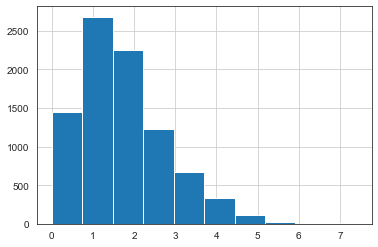

In [84]:
df_seoulbike_treated['wind_speed_(m/s)'].hist()

In [85]:
#Now we have 7 categories before we had 65 unique numbers

In [86]:
#Let's do the same tecnic so visibility and solar radiation

In [87]:
#let's check the columns name again 
df_seoulbike_treated.columns

Index(['rented_bike_count', 'hour', 'temperature(°c)', 'humidity(%)',
       'wind_speed_(m/s)', 'visibility_(10m)', 'dew_point_temperature(°c)',
       'solar_radiation_(mj/m2)', 'rainfall(mm)', 'snowfall_(cm)', 'seasons',
       'holiday', 'functioning_day', 'day_of_week', 'year', 'month',
       'month_name', 'wind_category'],
      dtype='object')

Ok that happened during all the year
OK I will replace the upper outliers with the mean valuers during each season

#
Para lidar com outliers em um conjunto de dados durante o treinamento de um modelo de Machine Learning, existem várias abordagens. Vou explicar algumas delas:  

Substituição pela Média:
A substituição dos valores de outliers pela média é uma opção comum. No entanto, é importante considerar que a média é sensível a outliers. Portanto, essa abordagem pode distorcer os resultados.
Se você optar por substituir os outliers pela média da variável “velocidade do vento”, faça o seguinte:
Calcule a média dos valores não outliers.
Substitua os valores outliers pelo valor médio calculado.  
Substituição pela Mediana:
Como o valor médio é muito influenciado por outliers, recomenda-se substituir outliers pela mediana.
A mediana é menos sensível a valores extremos e é uma medida de tendência central mais robusta.
No seu caso, você pode calcular a mediana da variável “velocidade do vento” e substituir os outliers por esse valor.
Outras Técnicas:
Além da média e mediana, você também pode considerar outras técnicas, como a interpolação ou o uso de modelos preditivos para estimar os valores ausentes.

##Média sem Outliers:
Para calcular a média sem os outliers, você pode seguir estas etapas em Python:

Detectar Outliers:
Use o desvio padrão para identificar os valores discrepantes em sua variável “velocidade do vento”.
A biblioteca statistics possui funções úteis para isso.
Calcular a Média:
Após remover os outliers, calcule a média dos valores restantes.

In [88]:
df_seoulbike_treated['solar_radiation_(mj/m2)'].unique()

array([0.  , 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01, 0.54, 0.24, 0.08,
       0.3 , 0.8 , 1.  , 1.09, 1.12, 0.99, 0.74, 0.22, 0.06, 0.02, 0.25,
       0.43, 0.6 , 0.69, 0.53, 0.2 , 0.05, 0.64, 1.17, 0.88, 0.55, 0.18,
       0.21, 0.63, 0.93, 1.08, 1.1 , 0.96, 0.72, 0.36, 0.1 , 0.14, 0.41,
       0.98, 1.14, 1.04, 0.84, 0.51, 0.15, 1.22, 0.87, 0.56, 0.61, 0.89,
       1.05, 1.13, 1.06, 0.4 , 0.03, 0.28, 0.35, 0.62, 1.26, 1.24, 0.92,
       0.58, 0.19, 1.23, 0.13, 0.52, 0.48, 0.09, 0.34, 0.42, 0.32, 0.86,
       1.07, 0.17, 0.85, 0.47, 0.57, 0.91, 0.71, 0.12, 0.67, 0.77, 0.78,
       0.16, 0.66, 0.38, 0.11, 0.04, 0.07, 1.18, 0.9 , 0.33, 0.75, 0.59,
       0.29, 0.81, 0.83, 0.39, 1.15, 1.03, 0.95, 0.76, 1.02, 0.26, 0.5 ,
       0.27, 0.73, 0.46, 0.31, 1.2 , 1.19, 0.45, 0.49, 0.79, 0.44, 0.68,
       1.27, 1.25, 1.21, 0.7 , 1.28, 1.3 , 1.29, 0.82, 1.65, 2.04, 2.25,
       2.18, 1.91, 1.42, 1.57, 1.99, 2.22, 2.17, 1.89, 1.4 , 1.73, 2.12,
       2.29, 2.23, 1.94, 1.44, 1.72, 2.09, 2.3 , 2.

A medida de radiação solar que você possui, expressa em megajoules por metro quadrado (MJ/m²), é uma unidade comum para quantificar a quantidade de energia solar que atinge uma determinada área. Para classificar esses valores, podemos criar intervalos ou “bins” para determinar quando a radiação solar é fraca, moderada ou forte.

Vamos criar algumas categorias para os valores de radiação solar que você forneceu. Lembre-se de que essas categorias podem variar dependendo do contexto e dos padrões específicos do seu projeto. Aqui está uma sugestão:

Fraca:
Valores abaixo de 0.5 MJ/m² podem ser considerados fracos. Essa radiação solar é insuficiente para muitas aplicações, como geração de energia solar ou aquecimento solar.
Moderada:
Valores entre 0.5 MJ/m² e 1.0 MJ/m² podem ser classificados como moderados. Essa faixa indica uma quantidade razoável de radiação solar.
Forte:
Valores acima de 1.0 MJ/m² são considerados fortes. Essa radiação solar é ideal para a maioria das aplicações solares, como carregamento de baterias solares, aquecimento de água e geração de eletricidade.
Lembre-se de que esses intervalos são apenas uma sugestão inicial. Se você estiver trabalhando em um projeto específico, consulte as diretrizes ou padrões relevantes para determinar os intervalos mais adequados para sua aplicação. Além disso, considere ajustar esses limites com base nas necessidades específicas do seu projeto.

chamada SunData que calcula a irradiação solar diária média mensal em qualquer ponto do território brasileiro. Essa ferramenta é útil para o dimensionamento de sistemas fotovoltaicos. Ela utiliza dados do Atlas Brasileiro de Energia Solar, que é baseado em imagens de satélite e informações de mais de 72.000 pontos em todo o Brasil. Lembre-se de que essas informações são indicativas e têm limitações dos modelos utilizados. Para avaliações mais precisas, recomenda-se a medição da irradiação no local de interesse1.
A radiação solar compreende principalmente o espectro de 180 a 4000 nm, distribuídos aproximadamente nas seguintes proporções:
9% ultravioleta
41% visível
50% infravermelho2.

In [89]:
## Let's do the binning tecnic to solar radiation:

#We can create intervals or “bins” to determine when solar radiation is weak, moderate or strong

#Weak:
#Values below 0.5 MJ/m² can be considered weak. This solar radiation is insufficient for many applications, such as solar energy generation or solar heating.
#Moderate:
#Values between 0.5 MJ/m² and 1.0 MJ/m² can be classified as moderate. This range indicates a reasonable amount of solar radiation.
#Strong:
#Values above 1.0 MJ/m² are considered strong. This solar radiation is ideal for most solar applications, such as charging solar batteries, heating water and generating electricity.


# Defining the bins and labels for binning tecnic
bins_solar_radiation = [0.0, 0.5, 1.0,  float('inf')]
labels_solar_radiation = ['1_weak', '2_moderate', '3_strong']

# Crie uma nova coluna 'wind_category' com base na coluna 'wind_speed'
df_seoulbike_treated['solar_radiation_category'] = pd.cut(df_seoulbike_treated['solar_radiation_(mj/m2)'], bins=bins_solar_radiation, labels=labels_solar_radiation,include_lowest=True)

# Exiba o dataframe resultante
checking_solar_radiation = ['solar_radiation_(mj/m2)','solar_radiation_category']
df_seoulbike_treated[checking_solar_radiation]

,solar_radiation_(mj/m2),solar_radiation_category
0,0.0,1_weak
1,0.0,1_weak
2,0.0,1_weak
3,0.0,1_weak
4,0.0,1_weak
...,...,...
8755,0.0,1_weak
8756,0.0,1_weak
8757,0.0,1_weak
8758,0.0,1_weak


In [90]:
#checking if we have any NAN values
df_seoulbike_treated[checking_solar_radiation].isna().sum()

solar_radiation_(mj/m2)     0
solar_radiation_category    0
dtype: int64

In [91]:
weak = df_seoulbike_treated[(df_seoulbike_treated['solar_radiation_(mj/m2)'] < 0.5)]
moderate = df_seoulbike_treated[(df_seoulbike_treated['solar_radiation_(mj/m2)'] > 0.5) & (df_seoulbike_treated['solar_radiation_(mj/m2)'] <= 1.0)]
strong = df_seoulbike_treated[(df_seoulbike_treated['solar_radiation_(mj/m2)'] > 1.5)]


weak['solar_radiation_category'].unique()


['1_weak']
Categories (1, object): ['1_weak']

In [92]:

moderate['solar_radiation_category'].unique()



['2_moderate']
Categories (1, object): ['2_moderate']

In [93]:
strong['solar_radiation_category'].unique()

['3_strong']
Categories (1, object): ['3_strong']

A visibilidade está relacionada à clareza e à distância que podemos enxergar em condições climáticas. Embora não haja uma tabela específica como a Beaufort, a Organização Meteorológica Mundial (OMM) define categorias de visibilidade com base na distância visual:
Excelente: Mais de 10 km
Boa: De 5 a 10 km
Moderada: De 1 a 5 km
Ruim: De 500 m a 1 km
Muito Ruim: Menos de 500 m1.
Lembre-se de que essas classificações podem variar dependendo das fontes e dos padrões específicos de cada país. Sempre consulte fontes confiáveis para obter informações atualizadas sobre radiação solar e visibilidade.

In [94]:
df_seoulbike_treated['visibility_(10m)'].unique()

array([2000, 1928, 1996, ...,  220,  524, 1688], dtype=int64)

In [95]:
df_seoulbike_treated['visibility_(10m)'].max()

2000

In [96]:
df_seoulbike_treated['visibility_(10m)'].min()

27

Organização Meteorológica Mundial (OMM) define categorias de visibilidade com base na distância visual:

Excelente: Mais de 10 km
Boa: De 5 a 10 km
Moderada: De 1 a 5 km
Ruim: De 500 m a 1 km
Muito Ruim: Menos de 500 m

In [97]:
#Excelent: More then 10000 m 
#Good: from 5000 to 10000 m 
#Moderate: De 1000 a 5000 m 
#Bad: De 500 m a 1000 m 
#Very Bad: Less then 500 m

# Defining the bins and labels for binning tecnic
bins_visibility = [0, 500, 1000,5000,10000, float('inf')] 
labels_visibility = ['1_very bad', '2_bad', '3_moderate','4_good','5_excelent']

# Crie uma nova coluna 'wind_category' com base na coluna 'wind_speed'
df_seoulbike_treated['visibility_category'] = pd.cut(df_seoulbike_treated['visibility_(10m)'], bins=bins_visibility, labels=labels_visibility,include_lowest=True)

# Exiba o dataframe resultante
checking_visibility = ['visibility_(10m)','visibility_category']
df_seoulbike_treated[checking_visibility]


,visibility_(10m),visibility_category
0,2000,3_moderate
1,2000,3_moderate
2,2000,3_moderate
3,2000,3_moderate
4,2000,3_moderate
...,...,...
8755,1894,3_moderate
8756,2000,3_moderate
8757,1968,3_moderate
8758,1859,3_moderate


In [98]:
very_bad = df_seoulbike_treated[(df_seoulbike_treated['visibility_(10m)'] < 500)]
bad = df_seoulbike_treated[(df_seoulbike_treated['visibility_(10m)'] > 500) & (df_seoulbike_treated['visibility_(10m)'] <= 1000)]
moderate = df_seoulbike_treated[(df_seoulbike_treated['visibility_(10m)'] > 1000) & (df_seoulbike_treated['solar_radiation_(mj/m2)']<= 5000)]
good = df_seoulbike_treated[(df_seoulbike_treated['visibility_(10m)'] > 5000) & (df_seoulbike_treated['solar_radiation_(mj/m2)']<= 10000)]
very_good = df_seoulbike_treated[(df_seoulbike_treated['visibility_(10m)'] > 10000)]


very_bad['visibility_category'].unique()



['1_very bad']
Categories (1, object): ['1_very bad']

In [99]:
bad['visibility_category'].unique()

['2_bad']
Categories (1, object): ['2_bad']

In [100]:
moderate['visibility_category'].unique()

['3_moderate']
Categories (1, object): ['3_moderate']

In [101]:
good['visibility_category'].unique()

[], Categories (0, object): []

In [102]:
good[checking_visibility]

,visibility_(10m),visibility_category


# checking....

In [103]:
#Good we have just one value and we don't have NAN values in our classification binning

In [104]:
#now let's do the same to visibility feature

In [105]:
import statistics

# Calcula o desvio padrão e a média
desvio_padrao = statistics.stdev(df_seoulbike_treated['wind_speed_(m/s)'])

In [106]:
desvio_padrao

1.036299991483835

In [107]:
media = statistics.mean(df_seoulbike_treated['wind_speed_(m/s)'])

In [108]:
media

1.7249086756965137

In [109]:
# Define um limite para identificar outliers (por exemplo, 2.3 vezes o desvio padrão)
limite_outliers = 2.3 * desvio_padrao

In [110]:
# Filtra os valores que não são outliers
velocidades_sem_outliers = [v for v in df_seoulbike_treated['wind_speed_(m/s)'] if abs(v - media) <= limite_outliers]

In [111]:
# Calcula a média sem outliers
media_sem_outliers = statistics.mean(velocidades_sem_outliers)

print(f"Média sem outliers: {media_sem_outliers:.2f}")

Média sem outliers: 1.65


Neste caso eu deveria substituir pela média sem outliers

## Mediana:
Para calcular a mediana, você pode usar a função statistics.median():

In [112]:
mediana = statistics.median(velocidades_sem_outliers)
print(f"Mediana: {mediana:.2f}")


Mediana: 1.50


In [113]:
#first I will replace the outliers with the Media values
indices = outliers['wind_speed_(m/s)'].index


NameError: name 'outliers' is not defined

In [114]:
df_seoulbike_treated.loc[indices,'wind_speed_(m/s)']=media_sem_outliers

NameError: name 'indices' is not defined

In [115]:
#No now wwe dont have wind_speed over the mild_upper_bound
df_seoulbike_treated[df_seoulbike_treated['wind_speed_(m/s)']>mild_upper_bound]

,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,month_name,wind_category,solar_radiation_category,visibility_category
82,311,10,-1.099609,40,4.5,2000,-13.000000,0.64,0.0,0.0,Winter,0,1,0,2017,12,Dec,3_light breeze,2_moderate,3_moderate
84,393,12,-0.300049,38,4.8,1823,-12.898438,1.11,0.0,0.0,Winter,0,1,0,2017,12,Dec,3_light breeze,3_strong,3_moderate
85,391,13,0.000000,30,5.4,1938,-15.500000,1.17,0.0,0.0,Winter,0,1,0,2017,12,Dec,4_weak breeze,3_strong,3_moderate
86,338,14,0.099976,27,4.5,2000,-16.703125,1.09,0.0,0.0,Winter,0,1,0,2017,12,Dec,3_light breeze,3_strong,3_moderate
87,341,15,-0.099976,25,5.8,2000,-17.796875,0.88,0.0,0.0,Winter,0,1,0,2017,12,Dec,4_weak breeze,2_moderate,3_moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7933,1118,13,10.601562,38,4.6,2000,-3.099609,1.63,0.0,0.0,Autumn,0,1,5,2018,10,Oct,3_light breeze,3_strong,3_moderate
7937,1176,17,9.500000,34,5.7,2000,-5.601562,0.45,0.0,0.0,Autumn,0,1,5,2018,10,Oct,4_weak breeze,1_weak,3_moderate
7985,1274,17,10.000000,43,4.9,2000,-2.000000,0.43,0.0,0.0,Autumn,0,1,0,2018,10,Oct,3_light breeze,1_weak,3_moderate
8242,0,10,11.296875,68,4.7,1984,5.500000,0.44,0.0,0.0,Autumn,0,0,4,2018,11,Nov,3_light breeze,1_weak,3_moderate


In [116]:
df_seoulbike_treated.describe()

,rented_bike_count,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724905,1436.825799,4.074219,0.569111,0.148687,0.075068
std,644.997468,11.944881,20.362413,1.036305,608.298712,13.054688,0.868734,1.128193,0.436725
min,0.000000,-17.796875,0.000000,0.000000,27.000000,-30.593750,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.699219,0.000000,0.000000,0.000000
50%,504.500000,13.703125,57.000000,1.500000,1698.000000,5.101562,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.796875,0.930000,0.000000,0.000000
max,3556.000000,39.406250,98.000000,7.400000,2000.000000,27.203125,3.520000,35.000000,8.800000


#NÃO FAZER O REPLACE#######Now I will replace the original dataset with the NAN values
df_seoulbike_treated['wind_speed_(m/s)']=df_seoulbike_treated['wind_speed_(m/s)'].replace(df_seoulbike_treated_wind_speed_lied_upper_outliers_nan['wind_speed_(m/s)'])

In [117]:
#Veja agora vai constar os NANs
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   rented_bike_count          8760 non-null   int64   
 1   hour                       8760 non-null   category
 2   temperature(°c)            8760 non-null   float64 
 3   humidity(%)                8760 non-null   int64   
 4   wind_speed_(m/s)           8760 non-null   float32 
 5   visibility_(10m)           8760 non-null   int64   
 6   dew_point_temperature(°c)  8760 non-null   float16 
 7   solar_radiation_(mj/m2)    8760 non-null   float32 
 8   rainfall(mm)               8760 non-null   float64 
 9   snowfall_(cm)              8760 non-null   float32 
 10  seasons                    8760 non-null   category
 11  holiday                    8760 non-null   category
 12  functioning_day            8760 non-null   category
 13  day_of_week                8760 n

<AxesSubplot:>

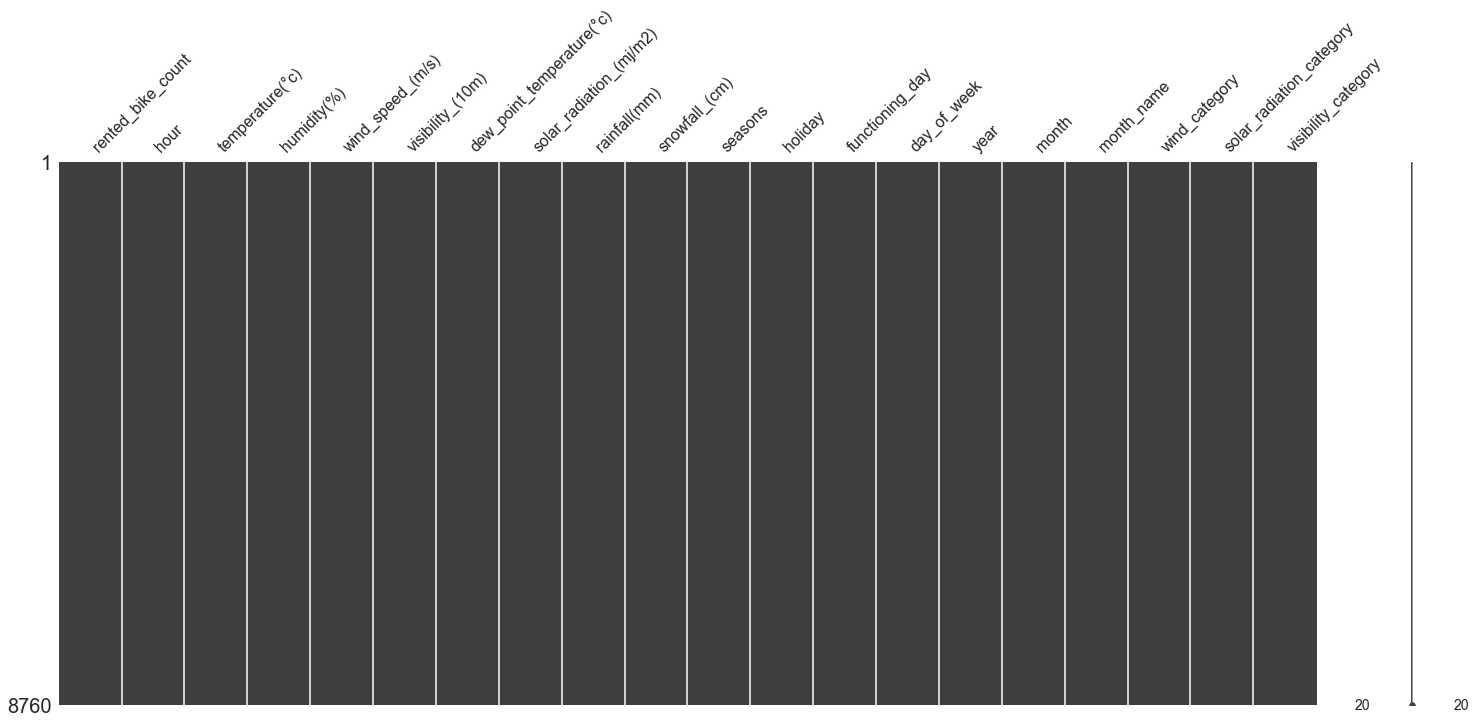

In [118]:
msno.matrix(df_seoulbike_treated)

In [119]:
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   rented_bike_count          8760 non-null   int64   
 1   hour                       8760 non-null   category
 2   temperature(°c)            8760 non-null   float64 
 3   humidity(%)                8760 non-null   int64   
 4   wind_speed_(m/s)           8760 non-null   float32 
 5   visibility_(10m)           8760 non-null   int64   
 6   dew_point_temperature(°c)  8760 non-null   float16 
 7   solar_radiation_(mj/m2)    8760 non-null   float32 
 8   rainfall(mm)               8760 non-null   float64 
 9   snowfall_(cm)              8760 non-null   float32 
 10  seasons                    8760 non-null   category
 11  holiday                    8760 non-null   category
 12  functioning_day            8760 non-null   category
 13  day_of_week                8760 n

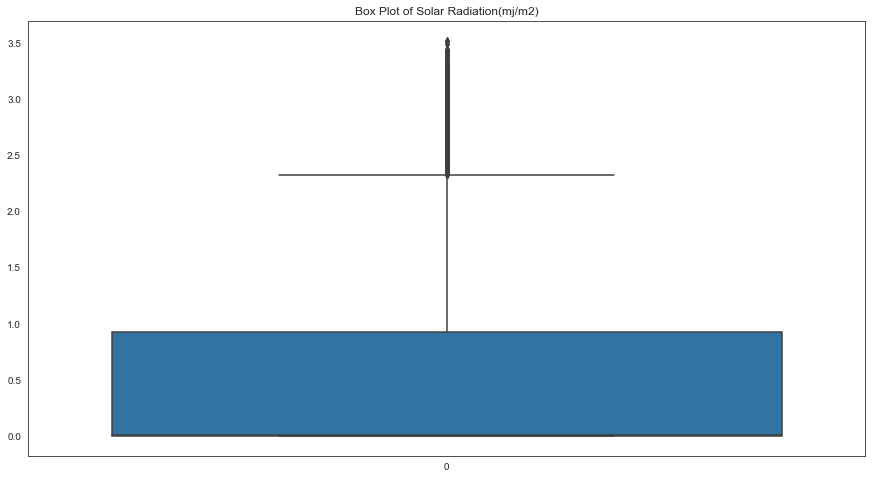

In [120]:


fig,ax=plt.subplots(figsize=(15,8))
#Box plot for xxx _outliers
sns.boxplot(data=df_seoulbike_treated['solar_radiation_(mj/m2)'])
ax.set_title('Box Plot of Solar Radiation(mj/m2)')
plt.show()

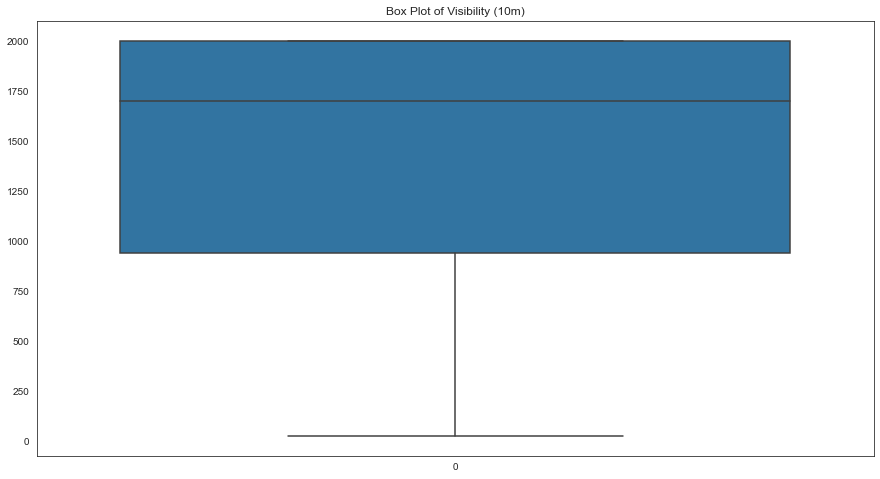

In [121]:



fig,ax=plt.subplots(figsize=(15,8))
#Box plot for xxx _outliers
sns.boxplot(data=df_seoulbike_treated['visibility_(10m)'])
ax.set_title('Box Plot of Visibility (10m)')
plt.show()

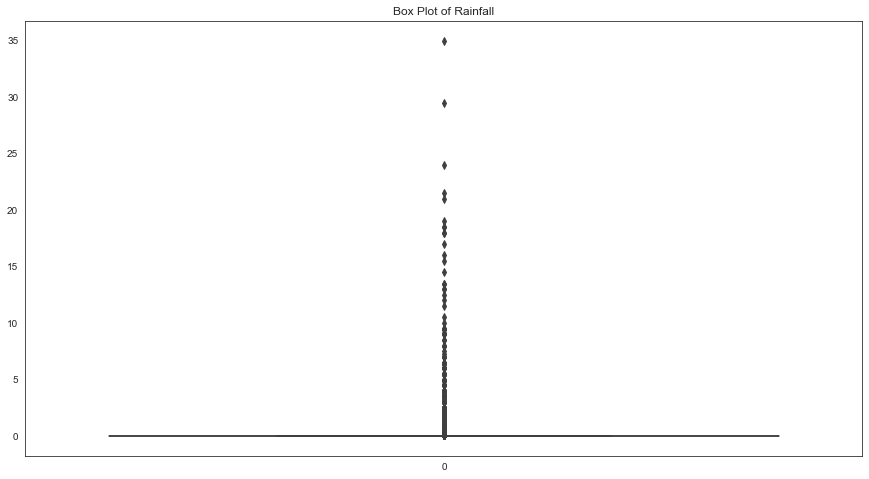

In [122]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for xxx _outliers
sns.boxplot(data=df_seoulbike_treated['rainfall(mm)'])
ax.set_title('Box Plot of Rainfall')
plt.show()

In [123]:
df_seoulbike_treated['rainfall(mm)'].value_counts()

0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
7.3        1
24.0       1
7.5        1
9.1        1
1.4        1
Name: rainfall(mm), Length: 61, dtype: int64

<AxesSubplot:>

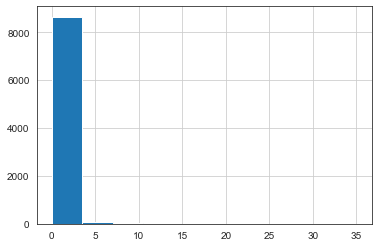

In [124]:
df_seoulbike_treated['rainfall(mm)'].hist()

Classificação com base na intensidade:
Essa classificação considera a quantidade de chuva em milímetros por hora (mm/h). Aqui estão algumas categorias com base nesse critério:
Chuva fraca: abaixo de 5,0 mm/h.
Chuva moderada: entre 5,0 e 25 mm/h.
Chuva forte: entre 25,1 e 50 mm/h.
Chuva muito forte: acima de 50,0 mm/h12.
Outras classificações:
Além da intensidade, também podemos considerar a duração da chuva:
Chuvisco: quando a intensidade é de 0,1 mm/h.
Chuva fraca: entre 0,2 mm/h e 9,9 mm/h.
Chuva moderada: entre 10 mm/h e 19 mm/h.
Chuva forte: entre 20 mm/h e 60 mm/h3.

In [125]:
#0.0mm  no rain = <0
#0.1mm to 0.2- drizzle
#From 0.2mm to 9.9mm/h - light rain
#From 10 to 19mm/h - moderate rain
#From 20mm to 60mm/h - heavy rain



# Defining the bins and labels for binning tecnic
bins_visibility = [-1.0,0.01,0.199, 9.9,19.99, float('inf')] 
labels_visibility = ['1_no rain','2_drizzle', '3_light rain', '4_moderate rain','5_heavy rain']

# Crie uma nova coluna 'wind_category' com base na coluna 'wind_speed'
df_seoulbike_treated['rainfall_category'] = pd.cut(df_seoulbike_treated['rainfall(mm)'], bins=bins_visibility, labels=labels_visibility,include_lowest=True)

# Exiba o dataframe resultante
checking_rainfall = ['rainfall(mm)','rainfall_category']
df_seoulbike_treated[checking_rainfall]

,rainfall(mm),rainfall_category
0,0.0,1_no rain
1,0.0,1_no rain
2,0.0,1_no rain
3,0.0,1_no rain
4,0.0,1_no rain
...,...,...
8755,0.0,1_no rain
8756,0.0,1_no rain
8757,0.0,1_no rain
8758,0.0,1_no rain


In [126]:
no_rain = df_seoulbike_treated[(df_seoulbike_treated['rainfall(mm)'] < 0.01)] 
drizzle = df_seoulbike_treated[(df_seoulbike_treated['rainfall(mm)'] >= 0.01) & (df_seoulbike_treated['rainfall(mm)'] < 0.2 )]
light_rain = df_seoulbike_treated[(df_seoulbike_treated['rainfall(mm)'] >= 0.2) & (df_seoulbike_treated['rainfall(mm)'] < 10)]
moderate_rain = df_seoulbike_treated[(df_seoulbike_treated['rainfall(mm)'] >= 10) & (df_seoulbike_treated['rainfall(mm)']< 20)]
heavy_rain = df_seoulbike_treated[(df_seoulbike_treated['rainfall(mm)'] >= 20)]


In [127]:
no_rain['rainfall_category'].unique()

['1_no rain']
Categories (1, object): ['1_no rain']

In [128]:
drizzle['rainfall_category'].unique()


['2_drizzle']
Categories (1, object): ['2_drizzle']

In [129]:
light_rain['rainfall_category'].unique()

['3_light rain']
Categories (1, object): ['3_light rain']

In [130]:
light_rain[(light_rain['rainfall_category']== 'drizzle')] 

,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),...,holiday,functioning_day,day_of_week,year,month,month_name,wind_category,solar_radiation_category,visibility_category,rainfall_category


In [131]:
light_rain[checking_rainfall]

,rainfall(mm),rainfall_category
51,0.5,3_light rain
54,1.0,3_light rain
57,2.5,3_light rain
123,0.2,3_light rain
138,0.3,3_light rain
...,...,...
8241,0.5,3_light rain
8520,0.2,3_light rain
8523,1.0,3_light rain
8601,9.1,3_light rain


In [132]:
moderate_rain['rainfall_category'].unique()

['4_moderate rain']
Categories (1, object): ['4_moderate rain']

In [133]:
moderate_rain[moderate_rain['rainfall_category']=='light rain']

,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),...,holiday,functioning_day,day_of_week,year,month,month_name,wind_category,solar_radiation_category,visibility_category,rainfall_category


In [134]:
moderate_rain[checking_rainfall]

,rainfall(mm),rainfall_category
2505,17.0,4_moderate rain
4012,19.0,4_moderate rain
4016,13.5,4_moderate rain
4017,10.0,4_moderate rain
4028,12.5,4_moderate rain
4687,13.5,4_moderate rain
4688,11.5,4_moderate rain
4708,10.5,4_moderate rain
4979,16.0,4_moderate rain
4981,14.5,4_moderate rain


In [135]:
heavy_rain['rainfall_category'].unique()

['5_heavy rain']
Categories (1, object): ['5_heavy rain']

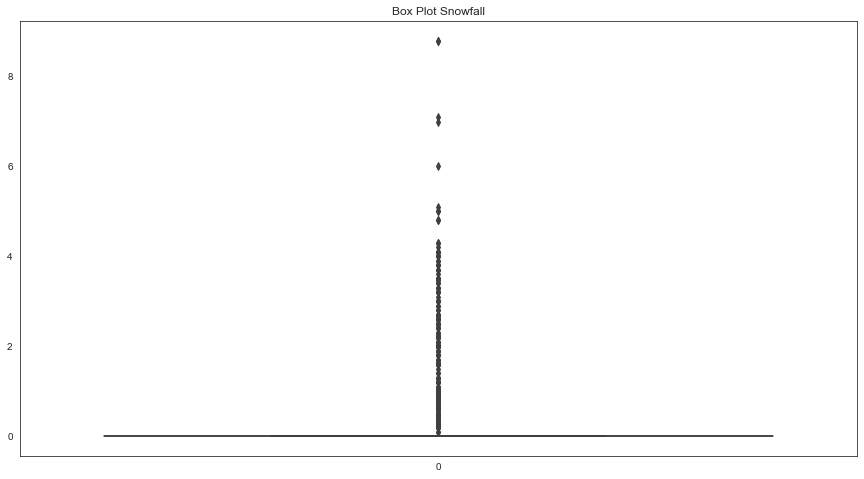

In [136]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for xxx _outliers
sns.boxplot(data=df_seoulbike_treated['snowfall_(cm)'])
ax.set_title('Box Plot Snowfall')
plt.show()

In [137]:
#https://www.theweathernetwork.com/en/news/science/explainers/how-is-snowfall-measured-a-meteorologist-explains
#No snow: from 0 to 0.1 
#Light snow: from 0.1 to 5 cm.
#Moderate snow: between 5 cm and 15 cm.
#Heavy snow: above 15 cm



# Defining the bins and labels for binning tecnic
bins_snowfall = [-1.0,0.1, 5, 15, float('inf')] 
labels_snowfall = ['1_no snow','2_light snow', '3_moderate snow', '4_heavy snow']

# Crie uma nova coluna 'wind_category' com base na coluna 'wind_speed'
df_seoulbike_treated['snow_category'] = pd.cut(df_seoulbike_treated['snowfall_(cm)'], bins=bins_snowfall, labels=labels_snowfall,include_lowest=True)

# Exiba o dataframe resultante
checking_snowfall = ['snowfall_(cm)','snow_category']
df_seoulbike_treated[checking_snowfall]


,snowfall_(cm),snow_category
0,0.0,1_no snow
1,0.0,1_no snow
2,0.0,1_no snow
3,0.0,1_no snow
4,0.0,1_no snow
...,...,...
8755,0.0,1_no snow
8756,0.0,1_no snow
8757,0.0,1_no snow
8758,0.0,1_no snow


In [138]:
no_snow = df_seoulbike_treated[(df_seoulbike_treated['snowfall_(cm)'] < 0.1)]
light_snow = df_seoulbike_treated[(df_seoulbike_treated['snowfall_(cm)'] < 0.1) & (df_seoulbike_treated['snowfall_(cm)'] < 5)]
moderate_snow = df_seoulbike_treated[(df_seoulbike_treated['snowfall_(cm)'] > 5) & (df_seoulbike_treated['snowfall_(cm)']<= 15)]
heavy_snow = df_seoulbike_treated[(df_seoulbike_treated['snowfall_(cm)'] >= 15)]

In [139]:
light_snow['snow_category'].unique()

['1_no snow']
Categories (1, object): ['1_no snow']

In [140]:
moderate_snow['snow_category'].unique()

['3_moderate snow']
Categories (1, object): ['3_moderate snow']

In [141]:
heavy_snow['snow_category'].unique()

[], Categories (0, object): []

In [142]:
df_seoulbike_treated['snow_category'].value_counts()

1_no snow          8317
2_light snow        437
3_moderate snow       6
4_heavy snow          0
Name: snow_category, dtype: int64

In [143]:
df_seoulbike_treated['snow_category'].value_counts(normalize='True')

1_no snow          0.949429
2_light snow       0.049886
3_moderate snow    0.000685
4_heavy snow       0.000000
Name: snow_category, dtype: float64

In [144]:
#Checking all columns and dropping the ones we had created binning ones

df_seoulbike_treated.columns

Index(['rented_bike_count', 'hour', 'temperature(°c)', 'humidity(%)',
       'wind_speed_(m/s)', 'visibility_(10m)', 'dew_point_temperature(°c)',
       'solar_radiation_(mj/m2)', 'rainfall(mm)', 'snowfall_(cm)', 'seasons',
       'holiday', 'functioning_day', 'day_of_week', 'year', 'month',
       'month_name', 'wind_category', 'solar_radiation_category',
       'visibility_category', 'rainfall_category', 'snow_category'],
      dtype='object')

In [145]:
#Let's drop 'wind_speed_(m/s)', 'visibility_(10m)','solar_radiation_(mj/m2)','rainfall(mm)','snowfall_(cm)'


In [146]:
df_seoulbike_treated=df_seoulbike_treated.drop(columns=['wind_speed_(m/s)', 'visibility_(10m)','solar_radiation_(mj/m2)','rainfall(mm)','snowfall_(cm)'])

In [147]:
# for our model we also do not need the "month_name", once we already have the "month" column and the "year" colum is not necessary once we preview the new value the new will be in the future and not in the past

df_seoulbike_treated=df_seoulbike_treated.drop(columns=['month_name', 'year'])

<AxesSubplot:>

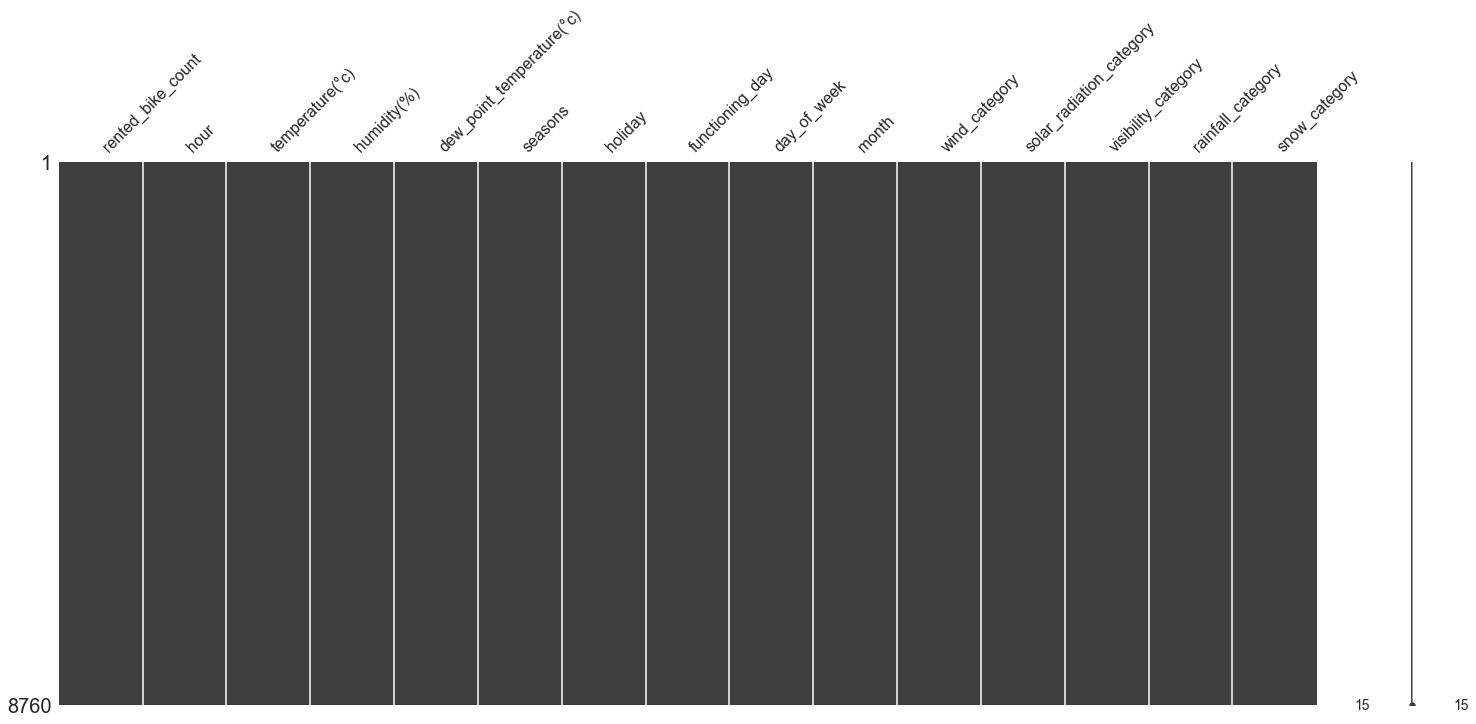

In [148]:
#checking for NAN values
msno.matrix(df_seoulbike_treated)

In [149]:
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   rented_bike_count          8760 non-null   int64   
 1   hour                       8760 non-null   category
 2   temperature(°c)            8760 non-null   float64 
 3   humidity(%)                8760 non-null   int64   
 4   dew_point_temperature(°c)  8760 non-null   float16 
 5   seasons                    8760 non-null   category
 6   holiday                    8760 non-null   category
 7   functioning_day            8760 non-null   category
 8   day_of_week                8760 non-null   category
 9   month                      8760 non-null   category
 10  wind_category              8760 non-null   category
 11  solar_radiation_category   8760 non-null   category
 12  visibility_category        8760 non-null   category
 13  rainfall_category          8760 n

In [150]:
new_order =['month','day_of_week','functioning_day','holiday','hour','seasons','temperature(°c)','dew_point_temperature(°c)','humidity(%)','rainfall_category','snow_category','wind_category','solar_radiation_category','visibility_category','rented_bike_count']
df_seoulbike_treated = df_seoulbike_treated.reindex(columns = new_order) 

In [151]:
df_seoulbike_treated

,month,day_of_week,functioning_day,holiday,hour,seasons,temperature(°c),dew_point_temperature(°c),humidity(%),rainfall_category,snow_category,wind_category,solar_radiation_category,visibility_category,rented_bike_count
0,12,4,1,0,0,Winter,-5.199219,-17.593750,37,1_no rain,1_no snow,2_plowing,1_weak,3_moderate,254
1,12,4,1,0,1,Winter,-5.500000,-17.593750,38,1_no rain,1_no snow,1_calm,1_weak,3_moderate,204
2,12,4,1,0,2,Winter,-6.000000,-17.703125,39,1_no rain,1_no snow,1_calm,1_weak,3_moderate,173
3,12,4,1,0,3,Winter,-6.199219,-17.593750,40,1_no rain,1_no snow,1_calm,1_weak,3_moderate,107
4,12,4,1,0,4,Winter,-6.000000,-18.593750,36,1_no rain,1_no snow,2_plowing,1_weak,3_moderate,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,11,4,1,0,19,Autumn,4.199219,-10.296875,34,1_no rain,1_no snow,2_plowing,1_weak,3_moderate,1003
8756,11,4,1,0,20,Autumn,3.400391,-9.898438,37,1_no rain,1_no snow,2_plowing,1_weak,3_moderate,764
8757,11,4,1,0,21,Autumn,2.599609,-9.898438,39,1_no rain,1_no snow,1_calm,1_weak,3_moderate,694
8758,11,4,1,0,22,Autumn,2.099609,-9.796875,41,1_no rain,1_no snow,1_calm,1_weak,3_moderate,712


In [152]:
df_seoulbike_treated.select_dtypes(include ="category")

,month,day_of_week,functioning_day,holiday,hour,seasons,rainfall_category,snow_category,wind_category,solar_radiation_category,visibility_category
0,12,4,1,0,0,Winter,1_no rain,1_no snow,2_plowing,1_weak,3_moderate
1,12,4,1,0,1,Winter,1_no rain,1_no snow,1_calm,1_weak,3_moderate
2,12,4,1,0,2,Winter,1_no rain,1_no snow,1_calm,1_weak,3_moderate
3,12,4,1,0,3,Winter,1_no rain,1_no snow,1_calm,1_weak,3_moderate
4,12,4,1,0,4,Winter,1_no rain,1_no snow,2_plowing,1_weak,3_moderate
...,...,...,...,...,...,...,...,...,...,...,...
8755,11,4,1,0,19,Autumn,1_no rain,1_no snow,2_plowing,1_weak,3_moderate
8756,11,4,1,0,20,Autumn,1_no rain,1_no snow,2_plowing,1_weak,3_moderate
8757,11,4,1,0,21,Autumn,1_no rain,1_no snow,1_calm,1_weak,3_moderate
8758,11,4,1,0,22,Autumn,1_no rain,1_no snow,1_calm,1_weak,3_moderate


In [153]:
categorical_columns = df_seoulbike_treated.select_dtypes(include ="category").columns.to_list()

In [154]:
categorical_columns

['month',
 'day_of_week',
 'functioning_day',
 'holiday',
 'hour',
 'seasons',
 'rainfall_category',
 'snow_category',
 'wind_category',
 'solar_radiation_category',
 'visibility_category']

In [155]:
#from sklearn.model_selection import train_test_split
target_y = df_seoulbike_treated["rented_bike_count"]
features_x = df_seoulbike_treated.drop("rented_bike_count",axis=1, inplace=False)
train_x,test_x, train_y,test_y = train_test_split(features_x, target_y, test_size=0.2, stratify=features_x['month'].to_numpy(), shuffle = True)

#### The scikit-learn does not provide any support for variable selection using a forward selection approach.   We will write a custom class for that. page 108

In [156]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.sparse import csr_matrix
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


###incluir CategoricalVaribleEncoder class from page 53 of pragmatic Machine Learning
class CategoricalVaribleEncoder(BaseEstimator): #page 53
    
    def __init__(self,categorical_features):
        self.categorical_features = categorical_features
        #self.preprocessing_transformer = make_column_transformer((OneHotEncoder(handle_unknown="ignore"),
                                                                 #self.categorical_features),)##inclui averbose
        self.preprocessing_transformer = ColumnTransformer(transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'),
                                                                          self.categorical_features)],remainder='passthrough')#remain the not specified columns)    
    def fit(self, X, y=None):
        self.preprocessing_transformer.fit(X)
        return self
        
    def transform(self, X):
        preprocessed_x = self.preprocessing_transformer.transform(X)
        return csr_matrix(preprocessed_x).todense()





class FowardSelectionLinearRegression(BaseEstimator): #page 108
    
    def __init__(self):
        self.optimal_predictors = None
        self.optimal_model = None
        
    def fit(self, X,y=None):
        current_predictors = []
        if not isinstance(X,pd.DataFrame):
            X = pd.DataFrame(X)
        remaining_predictors = list(X)
        adjusted_r2_diff = 1
        last_adjusted_r2 = 0
        
        while True:
            best_predictor, adjusted_r2, r2 = self._get_next_best_predictor_(X=X, Y=y, current_predictors = current_predictors,
                                                                           remaining_predictors = remaining_predictors)
            adjusted_r2_diff = round(adjusted_r2 - last_adjusted_r2, 2)
            if adjusted_r2_diff <= 0.00 or len(remaining_predictors) <= 0:
                break
                
            current_predictors.append(best_predictor)
            remaining_predictors.remove(best_predictor)
            last_adjusted_r2 = adjusted_r2
            
        self.optimal_predictors_ = current_predictors
        self.optimal_model_ = LinearRegression().fit(X[self.optimal_predictors_],y)
        
    def _adjusted_r2_score_(self, r2_val, n, k):
        return (1-(((1-r2_val)*(n-1))/(n-k-1)))
    
    def _get_next_best_predictor_(self, X, Y, current_predictors=None, remaining_predictors=None):
        max_adjusted_r2_val = 0
        adjusted_r2_val = 0
        best_r2_val = 0
        r2Val = 0
        best_predictor = None
        n = len(X)
        
        for predictor in remaining_predictors:
            lr = LinearRegression()
            
            predictors = []
            predictors.extend(current_predictors)
            predictors.append(predictor)
            
            lr.fit(X[predictors],Y)
            predY = lr.predict(X[predictors])
            r2Val = r2_score(Y,predY)
            adjusted_r2_val = self._adjusted_r2_score_(r2Val, n,len(predictors))
            if max_adjusted_r2_val < adjusted_r2_val:
                best_predictor = predictor
                max_adjusted_r2_val = adjusted_r2_val
                best_r2_val = r2Val
                
        return best_predictor, max_adjusted_r2_val, best_r2_val
    
    def predict(self, X):
        if not isinstance(X,pd.DataFrame):
            X = pd.DataFrame(X)
        X = X[self.optimal_predictors_]
        return self.optimal_model_.predict(X)
    

In [157]:
import inspect
inspect.getfullargspec(make_column_transformer)

FullArgSpec(args=[], varargs='transformers', varkw=None, defaults=None, kwonlyargs=['remainder', 'sparse_threshold', 'n_jobs', 'verbose'], kwonlydefaults={'remainder': 'drop', 'sparse_threshold': 0.3, 'n_jobs': None, 'verbose': False}, annotations={})

In [158]:
fs_lr = FowardSelectionLinearRegression()

bike_seoul_pl_fs_lr = Pipeline(steps = [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('scaler',StandardScaler()),
        ('foward_selection_model',fs_lr)
        
    ]
)
    
bike_seoul_pl_fs_lr.fit(train_x,train_y)
        

Pipeline(steps=[('one_hot_encoder',
                 CategoricalVaribleEncoder(categorical_features=['month',
                                                                 'day_of_week',
                                                                 'functioning_day',
                                                                 'holiday',
                                                                 'hour',
                                                                 'seasons',
                                                                 'rainfall_category',
                                                                 'snow_category',
                                                                 'wind_category',
                                                                 'solar_radiation_category',
                                                                 'visibility_category'])),
                ('scaler', StandardScaler()),
                ('fow

In [159]:
inspect.getfullargspec(bike_seoul_pl_fs_lr.fit)

FullArgSpec(args=['self', 'X', 'y'], varargs=None, varkw='fit_params', defaults=(None,), kwonlyargs=[], kwonlydefaults=None, annotations={})

In [160]:
## page 110 to see the best predictors
list(df_seoulbike_treated.loc[fs_lr.optimal_predictors_])

['month',
 'day_of_week',
 'functioning_day',
 'holiday',
 'hour',
 'seasons',
 'temperature(°c)',
 'dew_point_temperature(°c)',
 'humidity(%)',
 'rainfall_category',
 'snow_category',
 'wind_category',
 'solar_radiation_category',
 'visibility_category',
 'rented_bike_count']

In [161]:
len(list(df_seoulbike_treated.loc[fs_lr.optimal_predictors_]))

15

In [162]:
df_seoulbike_treated.shape

(8760, 15)

In [163]:
test_bike_seoul_pl_fs_lr_y = bike_seoul_pl_fs_lr.predict(test_x)


In [164]:
type(test_y)

pandas.core.series.Series

In [165]:
type(test_bike_seoul_pl_fs_lr_y)

numpy.ndarray

In [166]:
test_bike_seoul_pl_fs_lr_y_list = list(test_bike_seoul_pl_fs_lr_y)

In [167]:
len(test_bike_seoul_pl_fs_lr_y_list)

1752

In [168]:
len(list(test_y))

1752

In [169]:
r2_score_fs_lr = r2_score(list(test_y), test_bike_seoul_pl_fs_lr_y_list)

In [170]:
r2_score_fs_lr

0.6592911815791354

In [171]:
test_bike_seoul_pl_fs_lr_y.max(axis=0)

2292.7819565823665

In [172]:
minimun_value_fs = test_bike_seoul_pl_fs_lr_y.min(axis=0)
minimun_value_fs

-1095.4068919728816

That's is not good we have negative numbers here. Can I rent negative bikes?
No!!


In [173]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
#print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(list(test_y), test_bike_seoul_pl_fs_lr_y_list))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(list(test_y), test_bike_seoul_pl_fs_lr_y_list))

Mean squared error: 138499.86
Coefficient of determination: 0.66


In [174]:
#muito bem, se eu apenas montar um gráfico como as horas se repentem vejam como ficaria o gráfico:

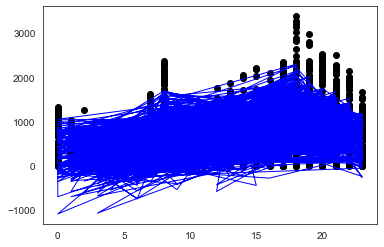

In [175]:
# Plot outputs
plt.scatter(test_x['hour'].to_numpy(), test_y, color="black")
plt.plot(test_x['hour'].to_numpy(), test_bike_seoul_pl_fs_lr_y, color="blue", linewidth=1)

#plt.xticks(())
#plt.yticks(())

plt.show()

#### Agrupando os valores para montar um gráfico com valores agrupados


In [176]:
#Bom para isto eu terei que voltar a unir os test_x e o text_y, assim como os valores previstos:


# Criar um DataFrame com as previsões e os valores reais
results_df = pd.DataFrame({'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': test_bike_seoul_pl_fs_lr_y})

# Agrupar os dados por hora e calcular a média das quantidades de bikes alugadas reais e previstas
grouped_data = results_df.groupby('hour').agg({'real_bike_count': 'mean', 'predicted_bike_count': 'mean'}).reset_index()




In [177]:
grouped_data

,hour,real_bike_count,predicted_bike_count
0,0,568.606061,368.148975
1,1,375.529412,269.583068
2,2,352.365385,415.558957
3,3,199.411765,245.076896
4,4,144.317647,327.662277
5,5,151.558442,322.082108
6,6,234.405063,163.066875
7,7,641.380952,568.233061
8,8,1110.000000,1096.489776
9,9,674.987342,484.033191


## Plotting the Foward Selection Linear Regression charts

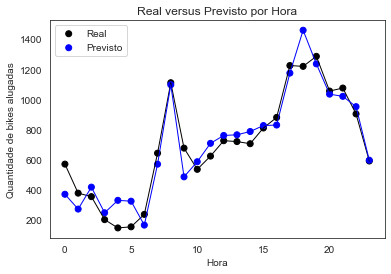

In [178]:

# Agrupar os dados por hora e calcular a média das quantidades de bikes alugadas reais e previstas

color_for_positive_real = 'black'
color_for_negative_real = 'coral'
color_for_positive_prevision = 'blue'
color_for_negative_prevision = 'red'


# Create an array of colors based on the values
colors_real = [color_for_positive_real if value >= 0 else color_for_negative_real for value in grouped_data['real_bike_count']]
color_prevision = [color_for_positive_prevision if value >= 0 else color_for_negative_prevision for value in grouped_data['predicted_bike_count']]
  

# Plotar o gráfico de dispersão com a média dos valores
plt.scatter(grouped_data['hour'], grouped_data['real_bike_count'], color=colors_real, label='Real')
plt.scatter(grouped_data['hour'], grouped_data['predicted_bike_count'], color=color_prevision, label='Previsto')

# Plotar as linhas conectando os pontos
plt.plot(grouped_data['hour'], grouped_data['real_bike_count'], color='black', linestyle='-', linewidth=1)
plt.plot(grouped_data['hour'], grouped_data['predicted_bike_count'], color='blue', linestyle='-', linewidth=1)

# Adicionar rótulos e título
plt.xlabel('Hora')
plt.ylabel('Quantidade de bikes alugadas')
plt.title('Real versus Previsto por Hora')
plt.legend()

# Mostrar o gráfico
plt.show()


In [179]:
def creating_charts_for_month(results_df):
    # Criar uma figura com subplots para cada mês
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))  # Assumindo 12 meses, ajuste conforme necessário

    # Iterar sobre cada mês e plotar os dados correspondentes
    for i, month in enumerate(range(1, 13)):  # Os meses estão numerados de 1 a 12
        ax = axes[i // 4, i % 4]  # Calcular a posição do subplot
        month_data = results_df[results_df['month'] == month]  # Selecionar os dados para o mês atual
        grouped_data = month_data.groupby('hour').agg({'real_bike_count': 'mean', 'predicted_bike_count': 'mean'}).reset_index()
    
        color_for_positive_real = 'black'
        color_for_negative_real = 'coral'
        color_for_positive_prevision = 'blue'
        color_for_negative_prevision = 'red'
    
        # Create an array of colors based on the values
        colors_real = [color_for_positive_real if value >= 0 else color_for_negative_real for value in grouped_data['real_bike_count']]
        color_prevision = [color_for_positive_prevision if value >= 0 else color_for_negative_prevision for value in grouped_data['predicted_bike_count']]
    
        # Plotar os dados do mês atual
        ax.scatter(grouped_data['hour'], grouped_data['real_bike_count'], color=colors_real, label='Real')
        ax.scatter(grouped_data['hour'], grouped_data['predicted_bike_count'], color=color_prevision, label='Previsto')
    
        # Plotar as linhas conectando os pontos
        ax.plot(grouped_data['hour'], grouped_data['real_bike_count'], color='black', linestyle='-', linewidth=1)
        ax.plot(grouped_data['hour'], grouped_data['predicted_bike_count'], color='blue', linestyle='-', linewidth=1)
    
        # Configurar títulos e rótulos do eixo
        month_name = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Set',10:'Oct',11:'Nov',12:'Dec'}
        ax.set_title(month_name[month])
        ax.set_xlabel('Hora')
        ax.set_ylabel('Quantidade de bikes alugadas')
        ax.legend()

    # Ajustar layout
    plt.tight_layout()

    # Mostrar os subplots
    plt.show()


In [180]:
#I really liked this chart, with it I can have a real idea about the prevision and the real bikes rented. But I wish see it by month. Lest see how it works


# Criar um DataFrame com as previsões e os valores reais
results_df = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': test_bike_seoul_pl_fs_lr_y})



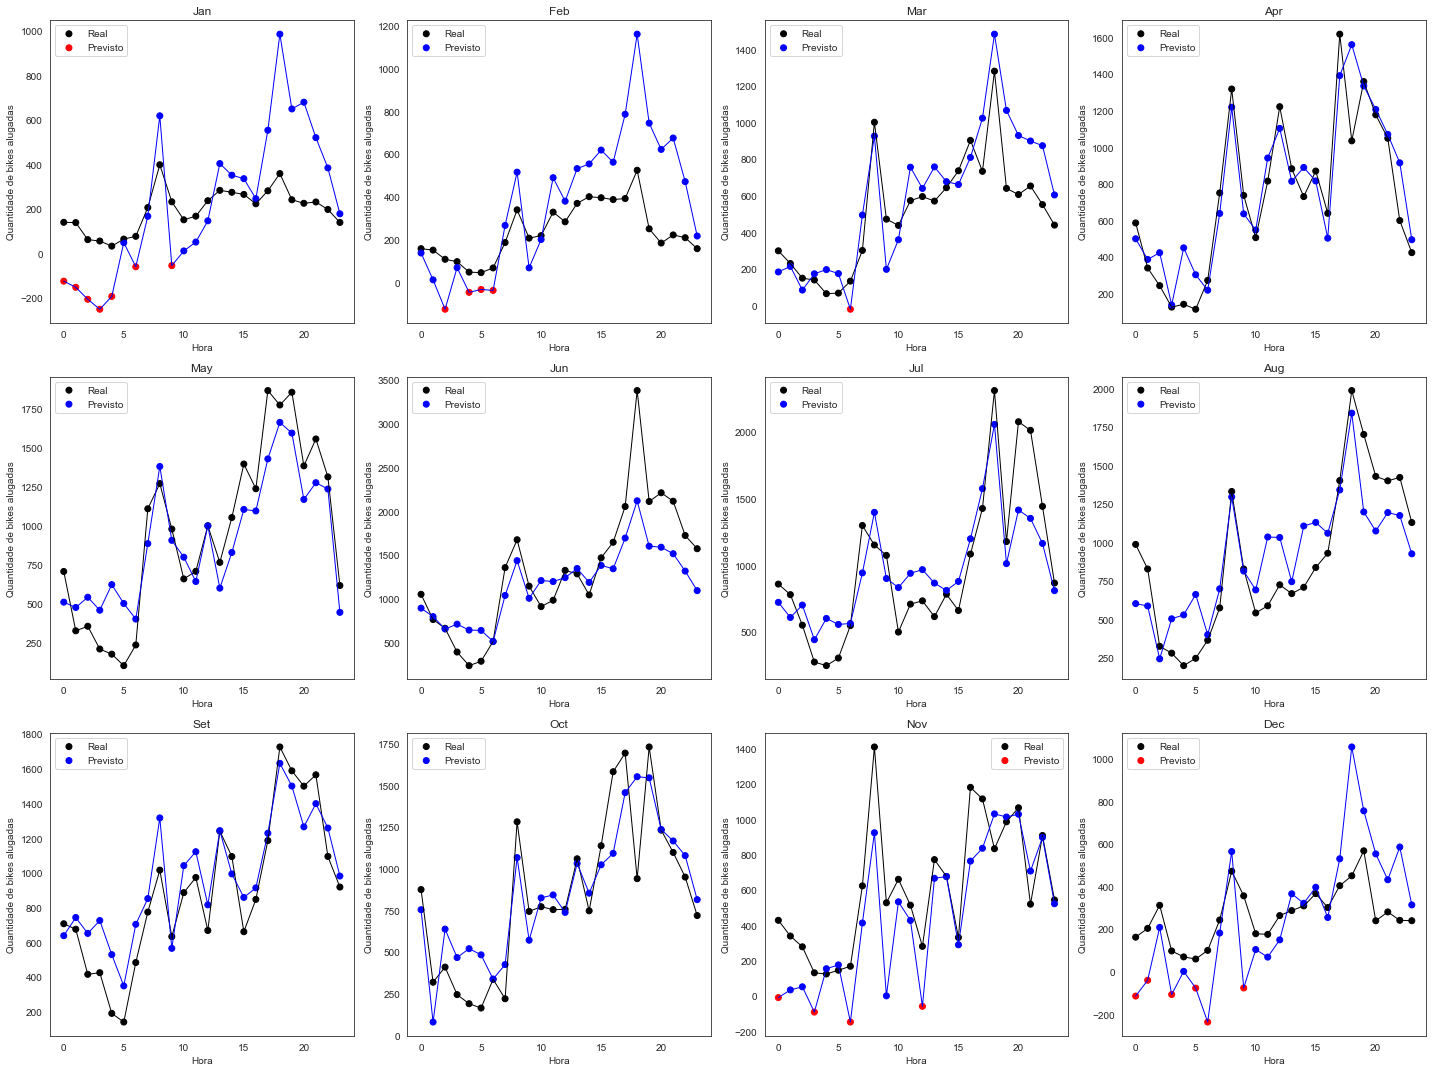

In [181]:
creating_charts_for_month(results_df)

TO DO: POIS É PARECE QUE ESTAMOS COM VALORES NEGATIVOS AQUI.... HUN... MAS QUE COISA... VOU TER QUE RESOLVER ISTO

In [182]:
# Ok let's fix it with the clipping tecnique. It's  post-processing tecnique.

predictions_clipped_fs_lr_y = np.clip(test_bike_seoul_pl_fs_lr_y, a_min=0, a_max=None)

In [183]:
#Let's fiz the charts witn the clipping tecnique applied



In [184]:
#I really liked this chart, with it I can have a real idea about the prevision and the real bikes rented. But I wish see it by month. Lest see how it works


# Criar um DataFrame com as previsões e os valores reais
results_df_clipped_fs_lr = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': predictions_clipped_fs_lr_y})


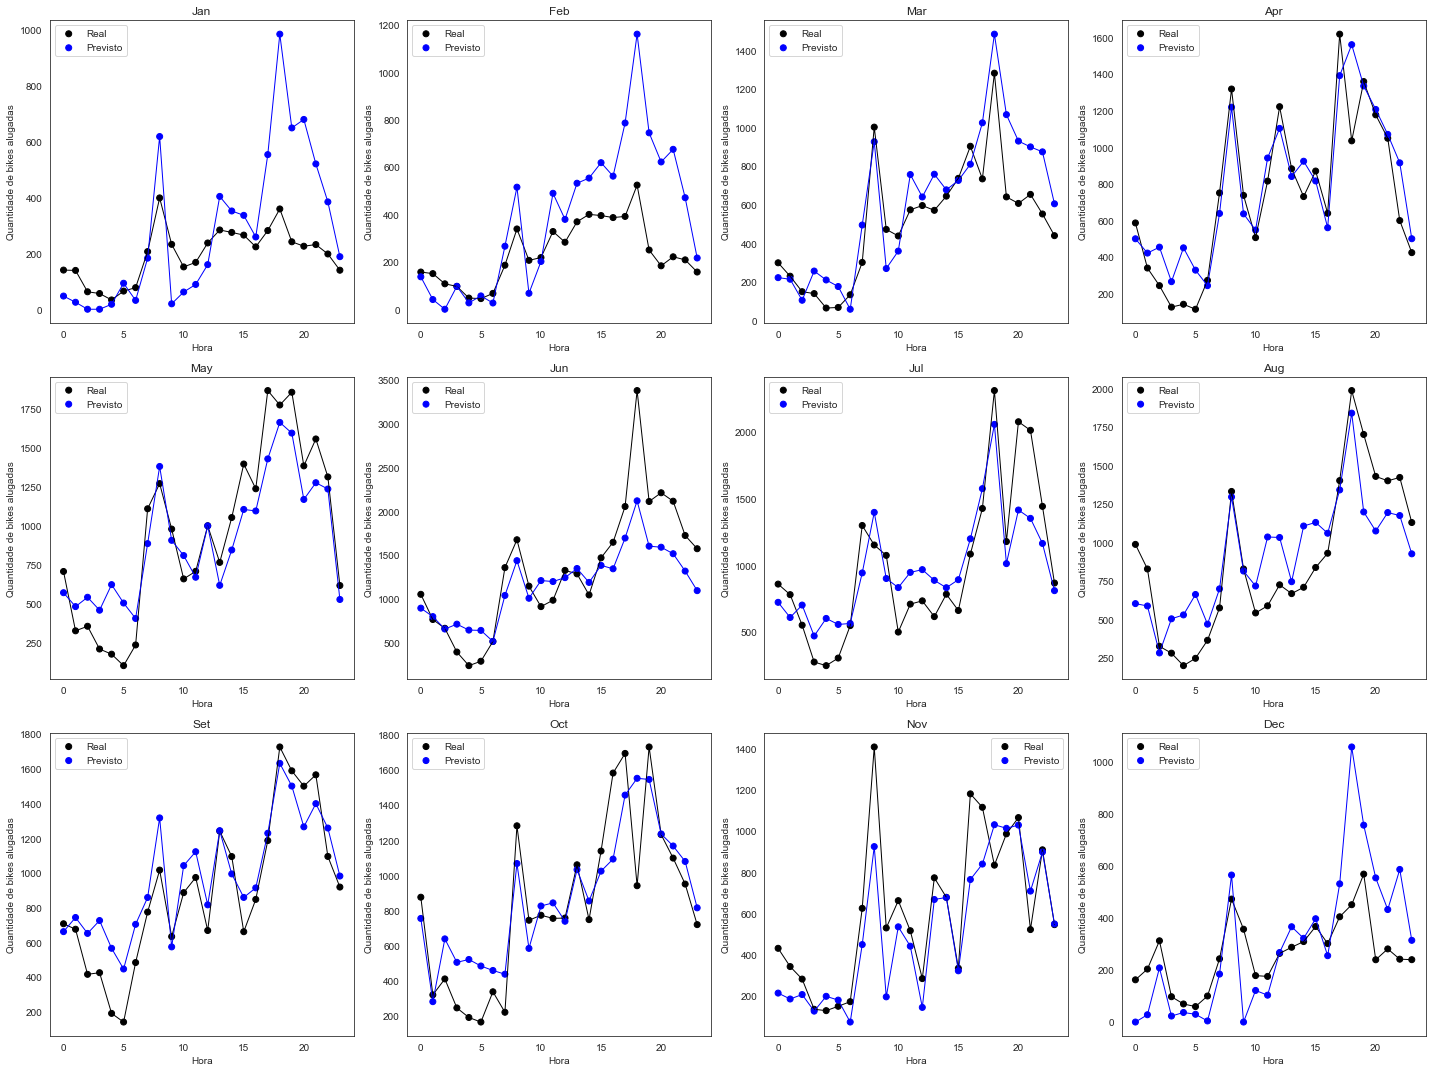

In [185]:
creating_charts_for_month(results_df_clipped_fs_lr)

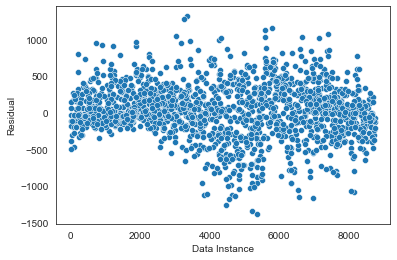

In [186]:
import seaborn as sns
residuals = predictions_clipped_fs_lr_y- test_y
sns.scatterplot(data = residuals)
plt.xlabel("Data Instance")
plt.ylabel("Residual")
plt.show()



## Polynomial Regression

In [187]:
class PolynomialRegression(BaseEstimator):
    '''
    '''
    def __init__(self, degree=2):
        self.degree = degree
        self.poly_reg_model = LinearRegression()
        
    def _generate_polynomial_features_(self, X):
        '''
        '''
        new_columns = []
        columns = list(X)
        for c in columns:
            for d in range(2, (self.degree+1)):
                new_c = str(c)+"^"+str(d)
                X[new_c]=pow(X[c],d)
        return X

    def fit(self, X, y=None):
        '''
        '''
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        X = self._generate_polynomial_features_(X)
        self.poly_reg_model.fit(X,y)
        
    def predict(self, X):
        '''
        '''
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        X = self._generate_polynomial_features_(X)
        return self.poly_reg_model.predict(X)
            

In [188]:
poly_reg = PolynomialRegression(degree=11)
poly_lr_pl = Pipeline(steps = [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('scaler',StandardScaler()),
        ('poly_reg',poly_reg)
        
    ]
)

poly_lr_pl.fit(train_x,train_y)

Pipeline(steps=[('one_hot_encoder',
                 CategoricalVaribleEncoder(categorical_features=['month',
                                                                 'day_of_week',
                                                                 'functioning_day',
                                                                 'holiday',
                                                                 'hour',
                                                                 'seasons',
                                                                 'rainfall_category',
                                                                 'snow_category',
                                                                 'wind_category',
                                                                 'solar_radiation_category',
                                                                 'visibility_category'])),
                ('scaler', StandardScaler()),
                ('pol

In [189]:
predited_poly_y = poly_lr_pl.predict(test_x)

In [190]:
predited_poly_y

array([-330.19046761, -652.23799709,  -82.7156344 , ..., 1382.59748134,
        708.93256993, 1088.10929478])

In [191]:
test_y.to_numpy()

array([  67,  404,  100, ...,  384,  255, 1422], dtype=int64)

In [192]:
r2_score(test_y.to_numpy(),predited_poly_y)

0.4107013498174371

In [193]:
train_predited_poly_y = poly_lr_pl.predict(train_x)

In [194]:
rs_score_polyr = r2_score(train_y.to_numpy(),train_predited_poly_y)
rs_score_polyr

0.4548782591926679

In [195]:
minimun_value_poly = predited_poly_y.min() #novamente negative values
minimun_value_poly 

-1606.7218229015227

### Plotting the Polynomial Regression charts

In [196]:
# https://matplotlib.org/stable/gallery/color/set_alpha.html#sphx-glr-gallery-color-set-alpha-py

### Agrupando os valores para montar um gráfico com valores agrupados

In [197]:
#########################
#Bom para isto eu terei que voltar a unir os test_x e o text_y, assim como os valores previstos:


# Criar um DataFrame com as previsões e os valores reais
grouped_data_poly = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': predited_poly_y})




In [198]:
grouped_data_poly 

,month,hour,real_bike_count,predicted_bike_count
2592,3,0,67,-330.190468
2008,2,16,404,-652.237997
2337,3,9,100,-82.715634
2613,3,21,731,910.154646
5414,7,14,1038,1536.405574
...,...,...,...,...
7517,10,5,152,596.517539
7518,10,6,441,779.949534
210,12,18,384,1382.597481
6291,8,3,255,708.932570


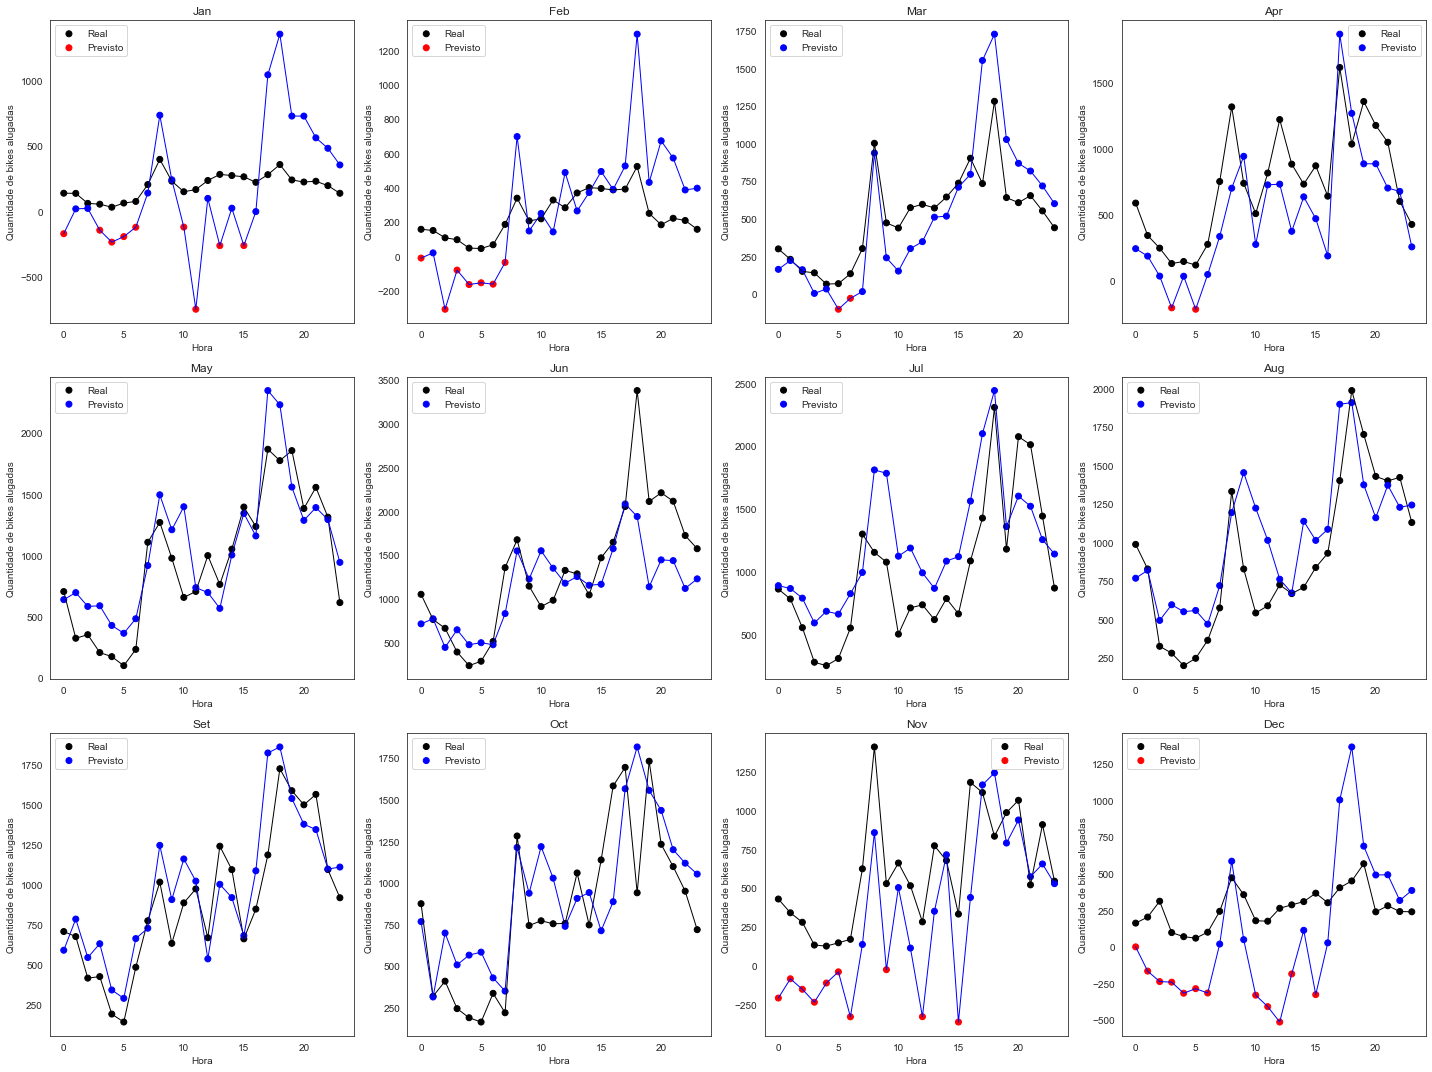

In [199]:
creating_charts_for_month(grouped_data_poly)

In [200]:
#We have a problem of overfitting here as explained in page 118

## Lasso

In [201]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_bike_model_pl = Pipeline(steps = [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('scaler',StandardScaler()),
        ('lr',lasso_model)
        
    ]
)
lasso_bike_model_pl.fit(train_x,train_y)


Pipeline(steps=[('one_hot_encoder',
                 CategoricalVaribleEncoder(categorical_features=['month',
                                                                 'day_of_week',
                                                                 'functioning_day',
                                                                 'holiday',
                                                                 'hour',
                                                                 'seasons',
                                                                 'rainfall_category',
                                                                 'snow_category',
                                                                 'wind_category',
                                                                 'solar_radiation_category',
                                                                 'visibility_category'])),
                ('scaler', StandardScaler()), ('lr', Lasso())])

In [202]:
test_lasso_bike_y = lasso_bike_model_pl.predict(test_x)


In [203]:
test_lasso_bike_y

array([-247.39743914,  504.32933056, -365.21422211, ..., 1119.2923276 ,
        498.35997268, 1105.89112824])

In [204]:
rs_score_lasso = r2_score(test_y.to_numpy(),test_lasso_bike_y)
rs_score_lasso

0.706215860985743

In [205]:
minimun_value_lasso = test_lasso_bike_y.min()
minimun_value_lasso

-1046.5802671201554

In [206]:
#########################
#Bom para isto eu terei que voltar a unir os test_x e o text_y, assim como os valores previstos:


# Criar um DataFrame com as previsões e os valores reais
grouped_data_lasso = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': test_lasso_bike_y})



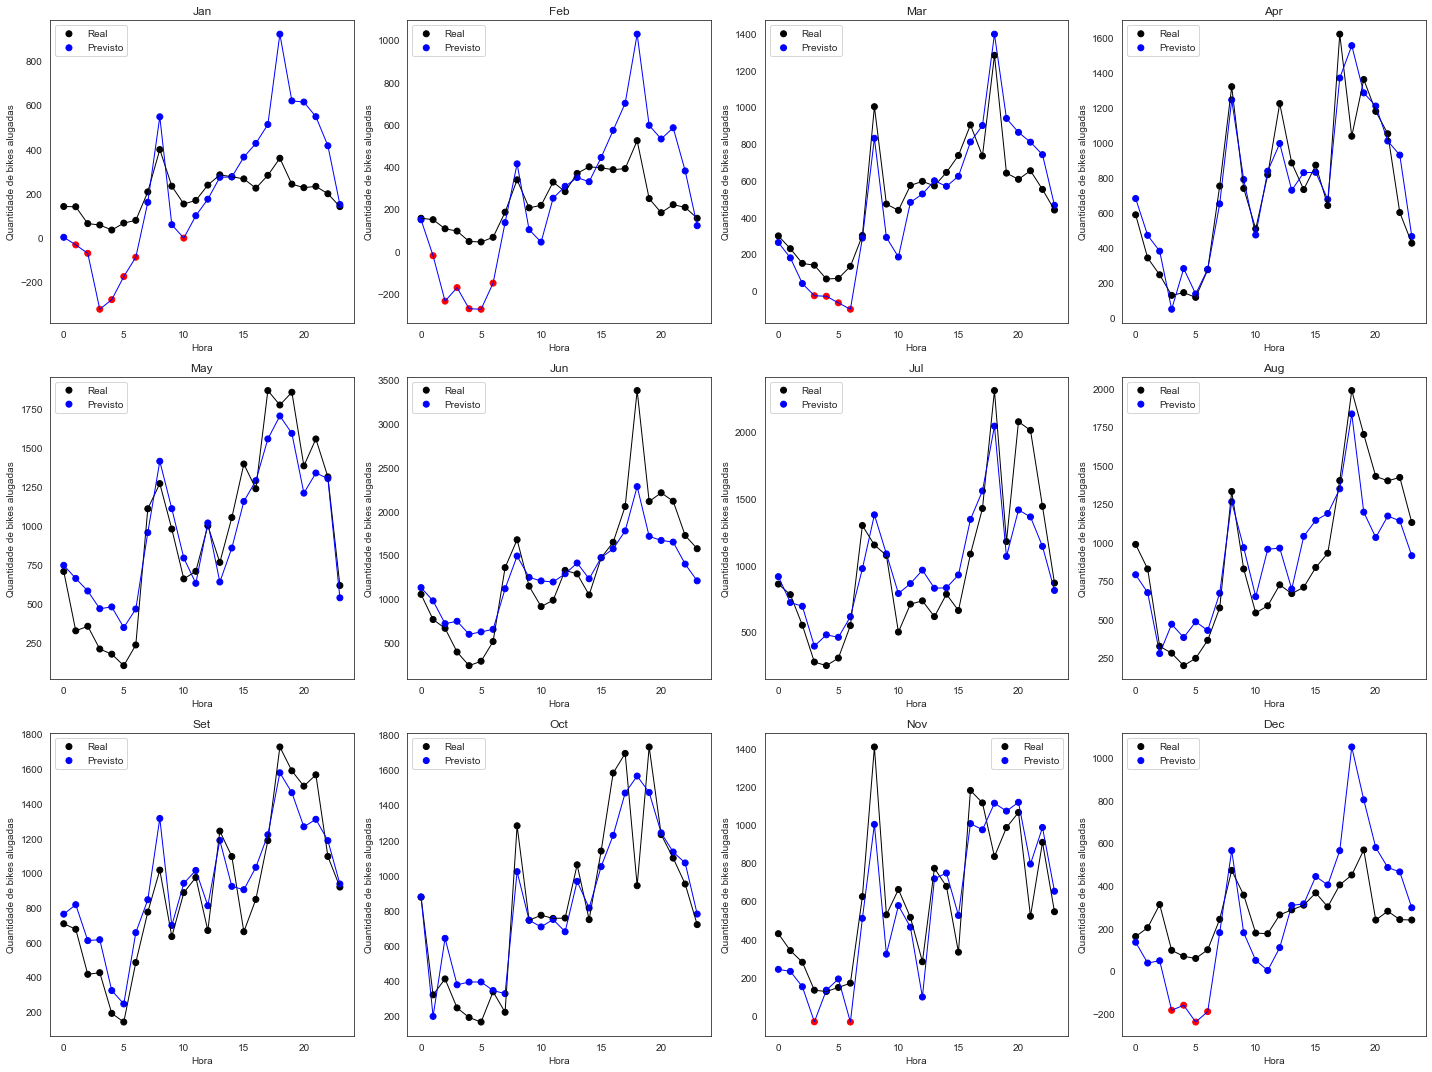

In [207]:
creating_charts_for_month(grouped_data_lasso)

In [208]:
#the clipping tecnique
predictions_clipped_lasso_bike_y = np.clip(test_lasso_bike_y, a_min=0, a_max=None)


## DecisionTreeRegressor

In [209]:
from sklearn.tree import DecisionTreeRegressor

dt_bike_reg = DecisionTreeRegressor()
dt_bike_reg_pl = Pipeline(steps = [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('scaler',StandardScaler()),
        ('dt_reg',dt_bike_reg)
        
    ]
)

dt_bike_reg_pl.fit(train_x,train_y)

Pipeline(steps=[('one_hot_encoder',
                 CategoricalVaribleEncoder(categorical_features=['month',
                                                                 'day_of_week',
                                                                 'functioning_day',
                                                                 'holiday',
                                                                 'hour',
                                                                 'seasons',
                                                                 'rainfall_category',
                                                                 'snow_category',
                                                                 'wind_category',
                                                                 'solar_radiation_category',
                                                                 'visibility_category'])),
                ('scaler', StandardScaler()),
                ('dt_

In [210]:
predicted_bike_dt_reg_y = dt_bike_reg_pl.predict(test_x)
r2_score_dtr = r2_score(test_y,predicted_bike_dt_reg_y)
r2_score_dtr 

0.8277612669978585

In [211]:
#TO DO ver se o bonitão está prevendo números negativos

In [212]:
minimun_value_dtr = predicted_bike_dt_reg_y.min()
minimun_value_dtr

0.0

In [213]:
#I really liked this chart, with it I can have a real idea about the prevision and the real bikes rented. But I wish see it by month. Lest see how it works


# Criar um DataFrame com as previsões e os valores reais
results_df_dtr = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': predicted_bike_dt_reg_y})



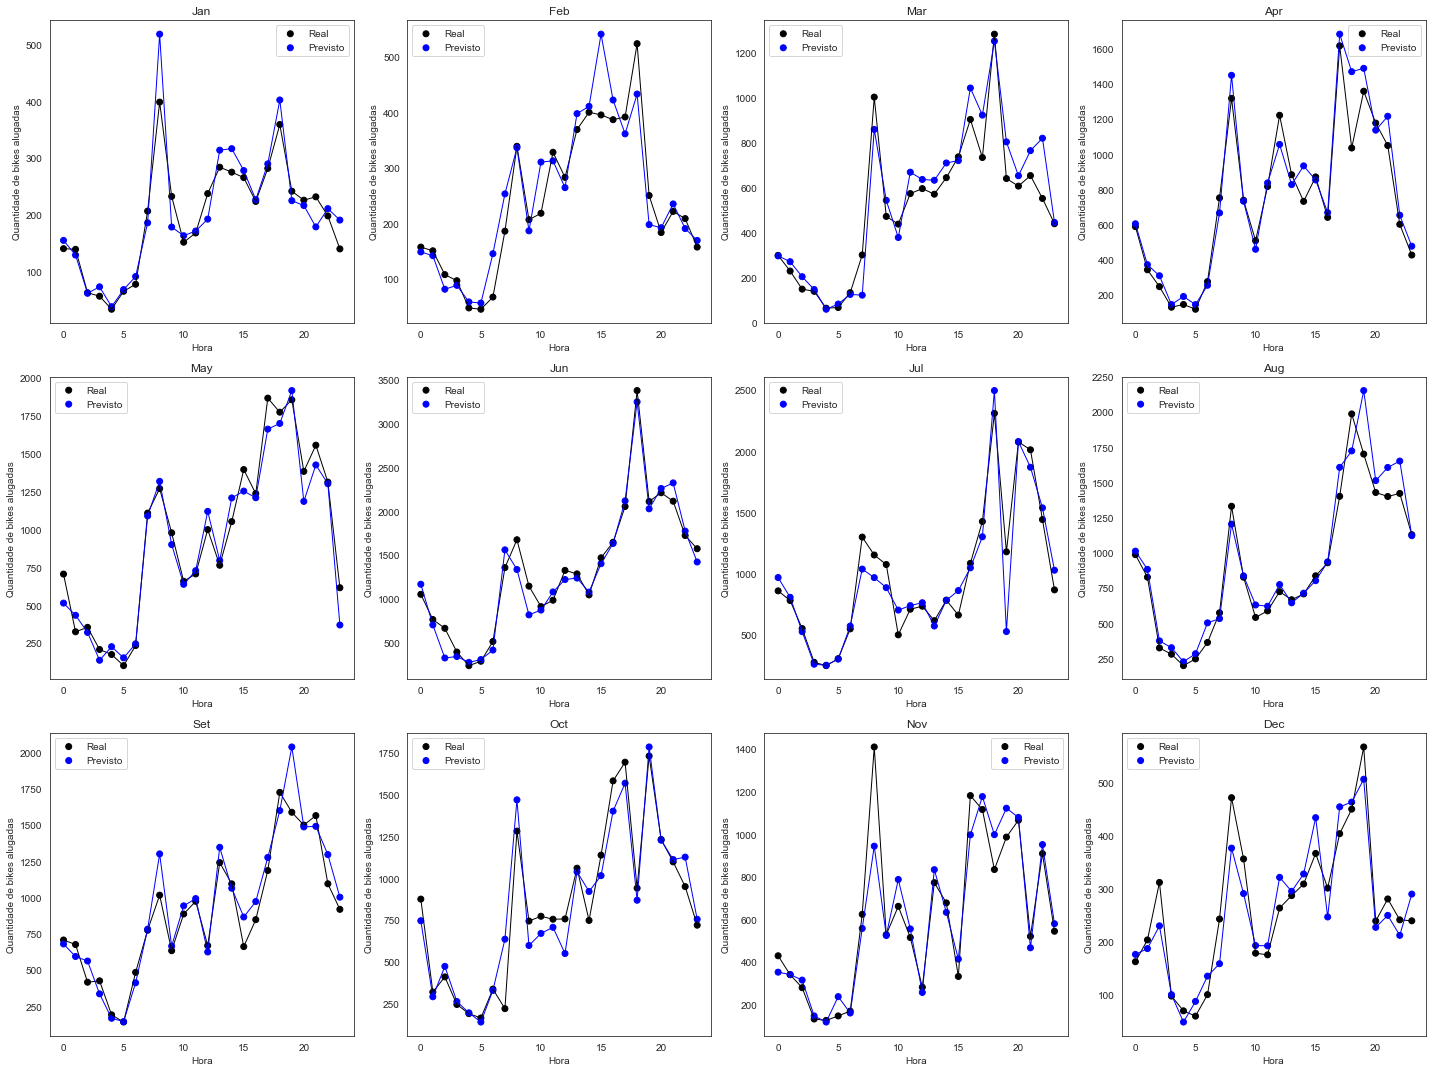

In [214]:
creating_charts_for_month(results_df_dtr)

## SVM

In [215]:


from sklearn.svm import LinearSVR

bike_svm_reg = LinearSVR(1.5)
bike_svm_reg_pl = Pipeline(steps = [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('scaler',StandardScaler()),
        ('SVM_reg',bike_svm_reg)
        
    ]
)

bike_svm_reg_pl.fit(train_x,train_y)

C:\Users\recal\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass epsilon=1.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Pipeline(steps=[('one_hot_encoder',
                 CategoricalVaribleEncoder(categorical_features=['month',
                                                                 'day_of_week',
                                                                 'functioning_day',
                                                                 'holiday',
                                                                 'hour',
                                                                 'seasons',
                                                                 'rainfall_category',
                                                                 'snow_category',
                                                                 'wind_category',
                                                                 'solar_radiation_category',
                                                                 'visibility_category'])),
                ('scaler', StandardScaler()),
                ('SVM

In [216]:
predicted_bike_dt_svm_y =bike_svm_reg_pl.predict(test_x)
rs_score_svm_lsvr = r2_score(test_y.to_numpy(),predicted_bike_dt_svm_y)
rs_score_svm_lsvr

0.6670599231995125

In [217]:
test_y

2592      67
2008     404
2337     100
2613     731
5414    1038
        ... 
7517     152
7518     441
210      384
6291     255
4764    1422
Name: rented_bike_count, Length: 1752, dtype: int64

In [218]:
predicted_bike_dt_svm_y

array([-170.67892343,  470.3525448 , -227.8941979 , ...,  973.93858633,
        411.37864138, 1056.06438303])

In [219]:
minimun_value_svm_lsvr = predicted_bike_dt_svm_y.min()
minimun_value_svm_lsvr

-1043.6610903091596

In [220]:
#I really liked this chart, with it I can have a real idea about the prevision and the real bikes rented. But I wish see it by month. Lest see how it works


# Criar um DataFrame com as previsões e os valores reais
results_df_svm = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': predicted_bike_dt_svm_y})



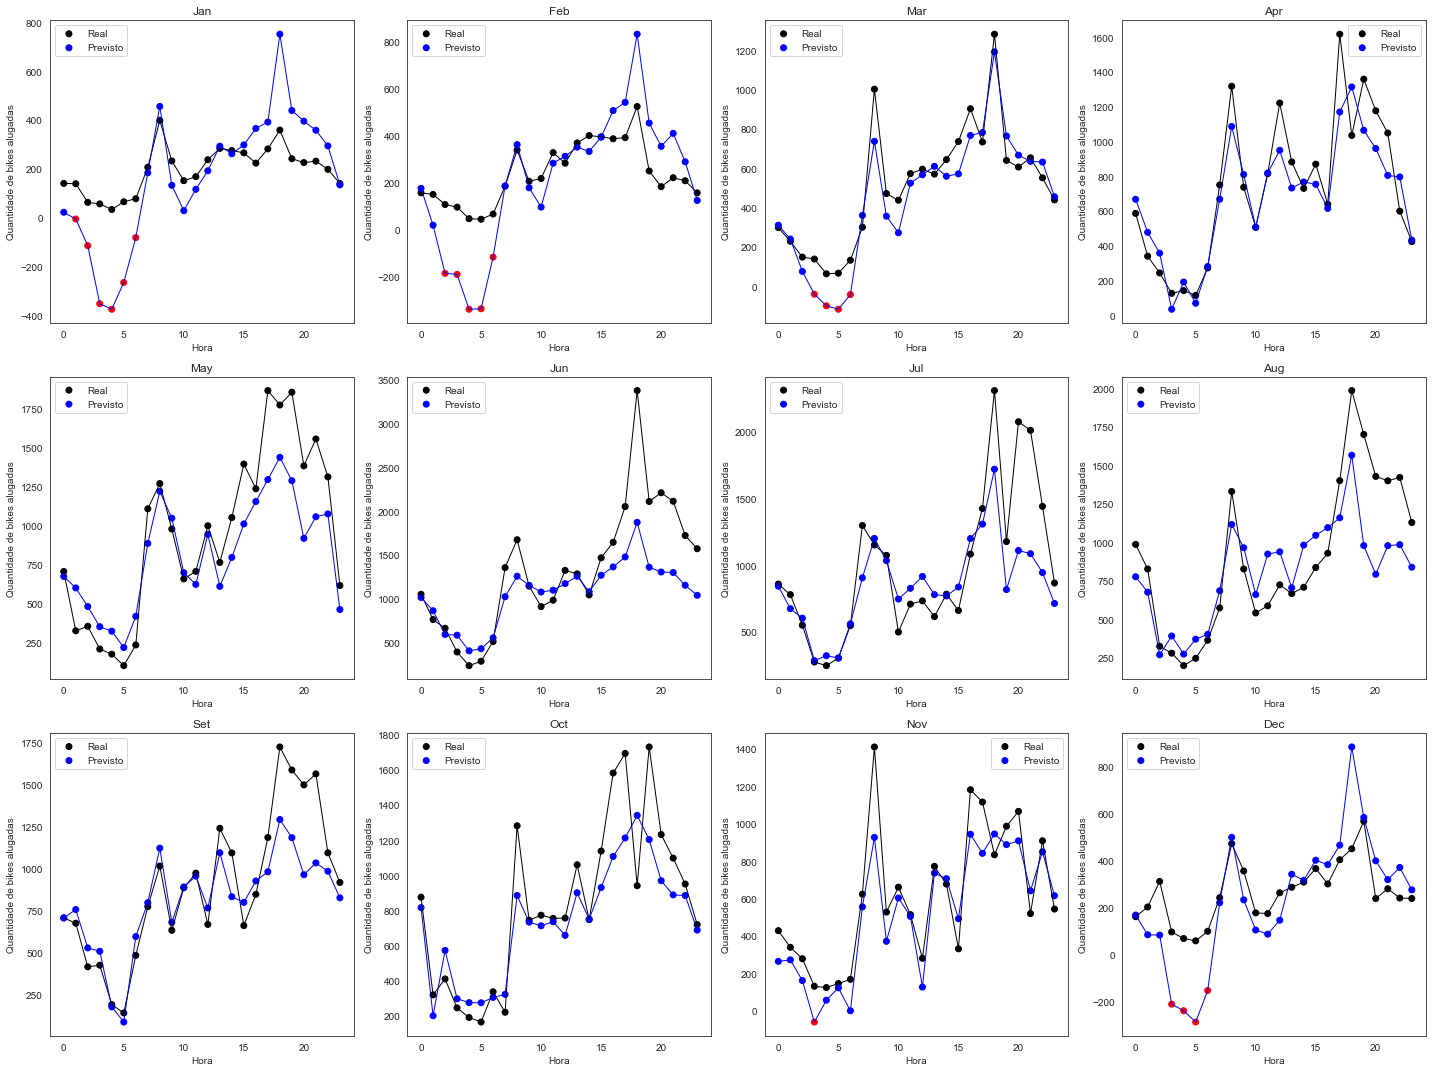

In [221]:
creating_charts_for_month(results_df_svm)

## SVR

In [222]:
from sklearn.svm import SVR

bike_svm_reg_2 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
bike_svm_reg_pl_2 = Pipeline(steps = [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('scaler',StandardScaler()),
        ('SVM_reg_2',bike_svm_reg_2)
        
    ]
)

bike_svm_reg_pl_2.fit(train_x,train_y)

Pipeline(steps=[('one_hot_encoder',
                 CategoricalVaribleEncoder(categorical_features=['month',
                                                                 'day_of_week',
                                                                 'functioning_day',
                                                                 'holiday',
                                                                 'hour',
                                                                 'seasons',
                                                                 'rainfall_category',
                                                                 'snow_category',
                                                                 'wind_category',
                                                                 'solar_radiation_category',
                                                                 'visibility_category'])),
                ('scaler', StandardScaler()),
                ('SVM

In [223]:
bike_svm_reg_pl_2.named_steps['one_hot_encoder'].preprocessing_transformer.get_feature_names()

['onehot__x0_1',
 'onehot__x0_2',
 'onehot__x0_3',
 'onehot__x0_4',
 'onehot__x0_5',
 'onehot__x0_6',
 'onehot__x0_7',
 'onehot__x0_8',
 'onehot__x0_9',
 'onehot__x0_10',
 'onehot__x0_11',
 'onehot__x0_12',
 'onehot__x1_0',
 'onehot__x1_1',
 'onehot__x1_2',
 'onehot__x1_3',
 'onehot__x1_4',
 'onehot__x1_5',
 'onehot__x1_6',
 'onehot__x2_0',
 'onehot__x2_1',
 'onehot__x3_0',
 'onehot__x3_1',
 'onehot__x4_0',
 'onehot__x4_1',
 'onehot__x4_2',
 'onehot__x4_3',
 'onehot__x4_4',
 'onehot__x4_5',
 'onehot__x4_6',
 'onehot__x4_7',
 'onehot__x4_8',
 'onehot__x4_9',
 'onehot__x4_10',
 'onehot__x4_11',
 'onehot__x4_12',
 'onehot__x4_13',
 'onehot__x4_14',
 'onehot__x4_15',
 'onehot__x4_16',
 'onehot__x4_17',
 'onehot__x4_18',
 'onehot__x4_19',
 'onehot__x4_20',
 'onehot__x4_21',
 'onehot__x4_22',
 'onehot__x4_23',
 'onehot__x5_Autumn',
 'onehot__x5_Spring',
 'onehot__x5_Summer',
 'onehot__x5_Winter',
 'onehot__x6_1_no rain',
 'onehot__x6_2_drizzle',
 'onehot__x6_3_light rain',
 'onehot__x6_4_mod

In [225]:
predicted_bike_dt_svm_y_2 =bike_svm_reg_pl_2.predict(test_x)
rs_score_svm_svr = r2_score(test_y.to_numpy(),predicted_bike_dt_svm_y_2)
rs_score_svm_svr

0.8417381148465806

In [226]:
minimun_values_svm_svr = predicted_bike_dt_svm_y_2.min()
minimun_values_svm_svr

-393.3701203063862

In [227]:

# Criar um DataFrame com as previsões e os valores reais
results_df_svr = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': predicted_bike_dt_svm_y_2})



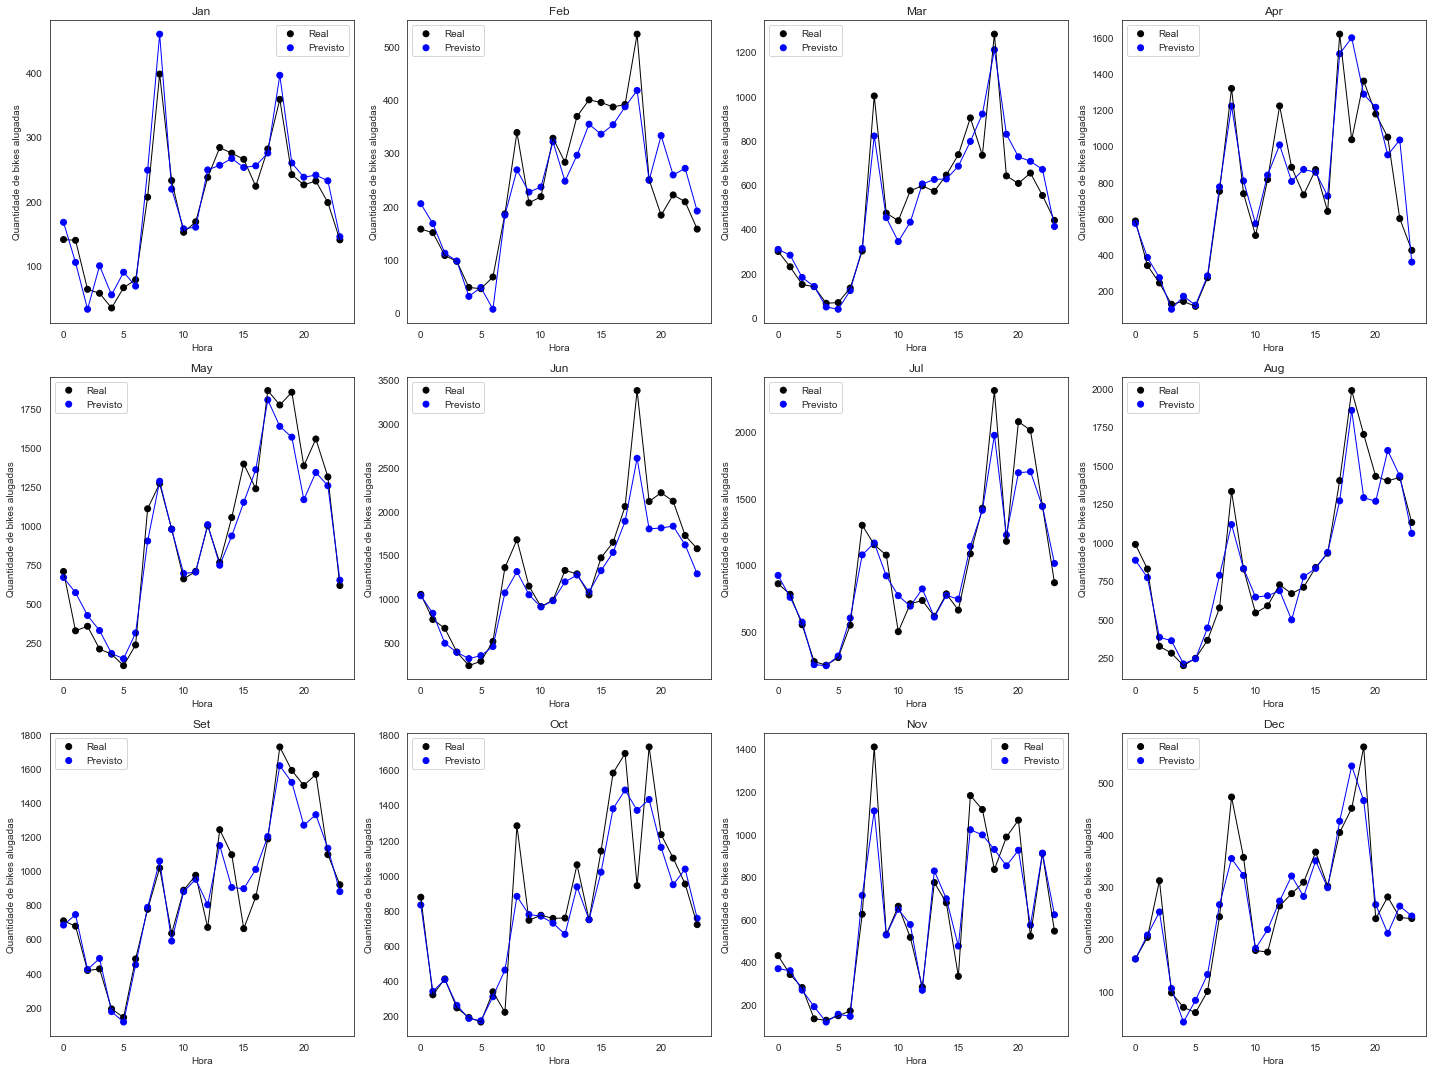

In [228]:
creating_charts_for_month(results_df_svr)

In [229]:
models_results = pd.DataFrame({'Model_Name': ['Foward Selection Linear Regression',
                                            'Polynomial Regression',
                                            'Lasso',
                                            'Decision Tree Regressor',
                                            'SVM LinearSVR',
                                            'SVM SVR'],
                             'R2 Score':[r2_score_fs_lr,
                                        rs_score_polyr,
                                        rs_score_lasso,
                                        r2_score_dtr,
                                        rs_score_svm_lsvr,
                                        rs_score_svm_svr],
                             'Minimun Value':[minimun_value_fs,
                                             minimun_value_poly,
                                             minimun_value_lasso,
                                             minimun_value_dtr,
                                             minimun_value_svm_lsvr,
                                             minimun_values_svm_svr]}
                             )
models_results = models_results.sort_values(by='R2 Score', ascending=False)
models_results

,Model_Name,R2 Score,Minimun Value
5,SVM SVR,0.841738,-393.370120
3,Decision Tree Regressor,0.827761,0.000000
2,Lasso,0.706216,-1046.580267
4,SVM LinearSVR,0.667060,-1043.661090
0,Foward Selection Linear Regression,0.659291,-1095.406892
1,Polynomial Regression,0.454878,-1606.721823


In [230]:
model = predicted_bike_dt_svm_y_2

In [231]:
# Saving the model
joblib.dump(model, '../modelo/model.pkl')

['../modelo/model.pkl']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Suponha que você já tenha definido suas colunas categóricas em 'categorical_columns'
# e seus dados de treinamento em 'train_x' e 'train_y'

class CategoricalVaribleEncoderandReorder(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_features,original_columns, new_column_order):
        self.categorical_features = categorical_features
        self.new_column_order = new_column_order
        self.one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
        self.column_reorderer = ColumnReorderer2(original_columns,new_column_order)

    def fit(self, X, y=None):
        self.one_hot_encoder.fit(X[self.categorical_features])
        return self

    def transform(self, X):
        one_hot_encoded = self.one_hot_encoder.transform(X[self.categorical_features])
        reordered_X = self.column_reorderer.transform(one_hot_encoded)
        return reordered_X

In [ ]:
# Crie o pipeline com o ColumnTransformer e o SVR
bike_svm_reg_2 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
bike_svm_reg_pl_2 = Pipeline(steps=[
        ('one_hot_encoder',  CategoricalVaribleEncoderandReorder(categorical_features = categorical_columns,original_columns = original_columns, new_column_order=encoded_columns)),
        #('reorder', ColumnReorderer(new_column_order=encoded_columns)),
        ('scaler', StandardScaler()),
        ('SVM_reg_2', bike_svm_reg_2)
    
    ]
)

# Ajuste o pipeline aos dados de treinamento
bike_svm_reg_pl_2.fit(train_x, train_y)

In [ ]:
# Crie o pipeline com o ColumnTransformer e o SVR
bike_svm_reg_2 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
bike_svm_reg_pl_2 = Pipeline(steps=[
        ('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('reorder', ColumnReorderer(new_column_order=encoded_columns)),
        ('scaler', StandardScaler()),
        ('SVM_reg_2', bike_svm_reg_2)
    
    ]
)

# Ajuste o pipeline aos dados de treinamento
bike_svm_reg_pl_2.fit(train_x, train_y)

In [ ]:
bike_svm_reg_pl_2.named_steps['one_hot_encoder'].preprocessing_transformer.get_feature_names()
'onehot__x0_1'

In [ ]:
bike_svm_reg_pl_2.named_steps['one_hot_encoder'].preprocessing_transformer.get_feature_names


In [ ]:
bike_svm_reg_pl_2.named_steps['one_hot_encoder'].fit(train_x)

In [ ]:
bike_svm_reg_pl_2.named_steps['one_hot_encoder'].transform(train_x)

In [ ]:
bike_svm_reg_pl_2.named_steps['one_hot_encoder'].preprocessing_transformer.get_feature_names_out

In [ ]:
bike_svm_reg_pl_2.named_steps['one_hot_encoder'].preprocessing_transformer.get_feature_names()

In [ ]:
preprocessor = bike_svm_reg_pl_2.named_steps['one_hot_encoder']

In [ ]:
preprocessor.fit(train_x)

In [ ]:
number_of_features = bike_svm_reg_pl_2.named_steps['SVM_reg_2'].n_features_in_
number_of_features 

In [ ]:
bike_svm_reg_pl_2.named_steps['SVM_reg_2']

Primeiro, obtenha o estimador SVR que está dentro do seu pipeline. Suponho que você tenha um pipeline chamado

In [ ]:
svm_estimator = bike_svm_reg_pl_2.named_steps['SVM_reg_2']

Em seguida, acesse o atributo support_ do estimador SVR. Esse atributo retorna uma máscara booleana indicando quais features foram selecionadas pelo RFE (Recursive Feature Elimination):


## End


In [ ]:
    CategoricalVaribleEncoder.get_params.
    

In [ ]:
O erro que você está enfrentando ocorre porque o objeto OneHotEncoder não possui o atributo get_feature_names_out. Isso pode ser devido à versão do scikit-learn que você está usando.

Aqui estão algumas informações relevantes:

Versão do scikit-learn:
A partir da versão 1.0 do scikit-learn, o método get_feature_names_out() está disponível para todos os transformadores, incluindo o OneHotEncoder.
Se você estiver usando uma versão anterior do scikit-learn (por exemplo, 0.24.0), o método correto a ser usado é get_feature_names().
Portanto, verifique a versão do scikit-learn que você está usando e atualize-a, se necessário1.
Solução:
Se você estiver usando uma versão mais recente do scikit-learn (1.0 ou superior), você pode usar o método get_feature_names_out() diretamente.
Caso contrário, substitua o uso de get_feature_names_out() por get_feature_names() no seu código.
Aqui está um exemplo de como obter os nomes das colunas após a aplicação do OneHotEncoder:
Python